## 4. Modelling | Clustering

> This section including encoding and dimensionality reduction through PCA and LDA techniques. It then explores various clustering algorithms like K-Means and DBSCAN, followed by hyper-parameter tuning to optimize these models. The final sections address class imbalance with sampling techniques and evaluate different classifiers' performance on the balanced datasets. This comprehensive approach aims to identify patterns and anomalies in financial transactions that could indicate money laundering activities.



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/A_M_L/step_4.csv')

In [ ]:
df.head(5)

,day_of_week,weather,type_of_collision,ped_action,road_surface,intersection,number_killed,number_injured,Crash_party_grouping,District,...,collision_severity_label,road_condition,Party_at_fault,Party_1_type,Party_2_type,Party_1_Direction,Party_2_Direction,season,collision_category,lighting_categorized
0,Tuesday,Cloudy,Head-On,No Pedestrian Involved,Dry,Midblock > 20ft,0,1,Vehicle(s) Only Involved,D3,...,Minor Injury,Normal,Party 1,Driver,Driver,West,East,Spring,Head-On,Daylight
1,Sunday,Clear,Rear End,No Pedestrian Involved,Dry,Intersection <= 20ft,0,1,Vehicle-Bicycle,D6,...,Minor Injury,Normal,Party 1,Driver,Bicycle,North,North,Fall,Rear End,Dark - Street Lights
2,Friday,Clear,Broadside,No Pedestrian Involved,Dry,Intersection <= 20ft,0,1,Vehicle-Bicycle,D5,...,Minor Injury,Normal,Not given,Bicycle,Driver,South,Not Stated,Winter,Broadside,Daylight
3,Saturday,Clear,Overturned,No Pedestrian Involved,Dry,Midblock > 20ft,0,1,Vehicle(s) Only Involved,D9,...,Moderate Injury,Normal,Party 1,Driver,Not Stated/Other,South,Not Stated,Fall,Overturned,Not Stated
4,Saturday,Clear,Hit Object,No Pedestrian Involved,Dry,Midblock > 20ft,0,1,Vehicle(s) Only Involved,D3,...,Minor Injury,Normal,Party 1,Driver,Not Stated/Other,West,Not Stated,Fall,Hit Object,Daylight


In [ ]:
for col in df.columns:
    print('Column:', col)
    print(df[col].value_counts())
    print()

Column: day_of_week
Friday       8657
Wednesday    8280
Tuesday      8248
Thursday     8224
Monday       7505
Saturday     7499
Sunday       6731
Name: day_of_week, dtype: int64

Column: weather
Clear      45248
Cloudy      5561
Raining     3247
Other        795
Fog          244
Wind          47
Snowing        2
Name: weather, dtype: int64

Column: type_of_collision
Broadside             16798
Vehicle/Pedestrian    11801
Rear End               8975
Sideswipe              7141
Other/Not Stated       4108
Head-On                3247
Hit Object             2086
Overturned              988
Name: type_of_collision, dtype: int64

Column: ped_action
No Pedestrian Involved                       40902
Crossing in Crosswalk at Intersection         8056
Crossing Not in Crosswalk                     2904
In Road, Including Shoulder                   1708
Not in road                                    725
Not Stated                                     641
Crossing in Crosswalk Not at Intersection  

### Preparing One-hot encoding Dataset

> This section likely deals with the initial dataset used for the analysis, which has been encoded to transform categorical data into a numerical format suitable for machine learning models. Encoding is crucial for preparing data for analysis, especially in clustering where the algorithm relies on numerical distances between data points.



In [ ]:
# One-hot encoding
df_encoded = pd.get_dummies(df.drop('collision_severity_label', axis=1))

In [ ]:
df_encoded.head(5)

,number_killed,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,weather_Clear,weather_Cloudy,...,collision_category_Other/Not Stated,collision_category_Overturned,collision_category_Rear End,collision_category_Sideswipe,collision_category_Vehicle/Pedestrian,lighting_categorized_Dark - No Street Lights/Not Functioning,lighting_categorized_Dark - Street Lights,lighting_categorized_Daylight,lighting_categorized_Dusk - Dawn,lighting_categorized_Not Stated
0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
original_encoded = pd.DataFrame(data=df_encoded)
original_encoded['collision_severity_label'] = df['collision_severity_label']
original_encoded.to_csv('/content/drive/MyDrive/A_M_L/original_encoded.csv', index=False)

## PCA Dataset

> PCA (Principal Component Analysis) is applied to the dataset in this step. PCA is a dimensionality reduction technique that transforms the data into a set of linearly uncorrelated variables called principal components. This step is crucial for simplifying the dataset while retaining the most significant information, making clustering more efficient and interpretable.



In [ ]:
pca = PCA()
pca.fit_transform(df_encoded)

array([[-5.41739920e-01,  8.84751880e-01, -3.00793548e-01, ...,
         3.37774917e-16,  1.10294855e-16,  1.76665130e-16],
       [-6.69769783e-02,  2.65061058e-01,  9.51768743e-01, ...,
         4.32729118e-16,  1.33501736e-15, -1.60555535e-16],
       [-4.42383034e-01, -6.31818836e-01, -7.81930127e-01, ...,
         5.59788032e-16,  2.15323470e-15, -2.28208778e-15],
       ...,
       [ 2.54468136e-01,  1.13525955e+00,  1.01737181e+00, ...,
        -1.32726342e-17, -1.02772224e-17,  1.84905613e-17],
       [-9.16995931e-01, -1.28629019e+00,  9.00013829e-01, ...,
        -2.94420234e-17,  5.34089832e-17, -1.19122704e-17],
       [-9.48339238e-01, -8.05416403e-01, -7.59593784e-01, ...,
         2.51122814e-17,  6.36389765e-17, -2.38140815e-17]])

In [ ]:
pca.explained_variance_ratio_

array([1.10191506e-01, 5.69000882e-02, 5.34626220e-02, 4.24721860e-02,
       3.38253433e-02, 3.18253291e-02, 2.87867227e-02, 2.78769551e-02,
       2.64941780e-02, 2.56303348e-02, 2.46477015e-02, 2.35277372e-02,
       2.29600378e-02, 2.28228947e-02, 2.23617227e-02, 2.08552034e-02,
       2.04799462e-02, 1.93481381e-02, 1.74626799e-02, 1.68492172e-02,
       1.67368897e-02, 1.64774898e-02, 1.63663881e-02, 1.52525295e-02,
       1.47682868e-02, 1.42416048e-02, 1.41868327e-02, 1.32578095e-02,
       1.28654059e-02, 1.25414829e-02, 1.24643458e-02, 1.17336814e-02,
       1.13340917e-02, 1.09867807e-02, 9.87562127e-03, 9.73470863e-03,
       9.61174582e-03, 8.14075067e-03, 7.68028070e-03, 6.96174841e-03,
       6.34692376e-03, 6.21445014e-03, 5.99503352e-03, 5.39443340e-03,
       5.27471904e-03, 5.08046053e-03, 4.97106319e-03, 4.87473275e-03,
       4.82711302e-03, 4.73169928e-03, 4.35740395e-03, 3.91266500e-03,
       3.88769051e-03, 3.33110716e-03, 3.10842173e-03, 3.09692545e-03,
      

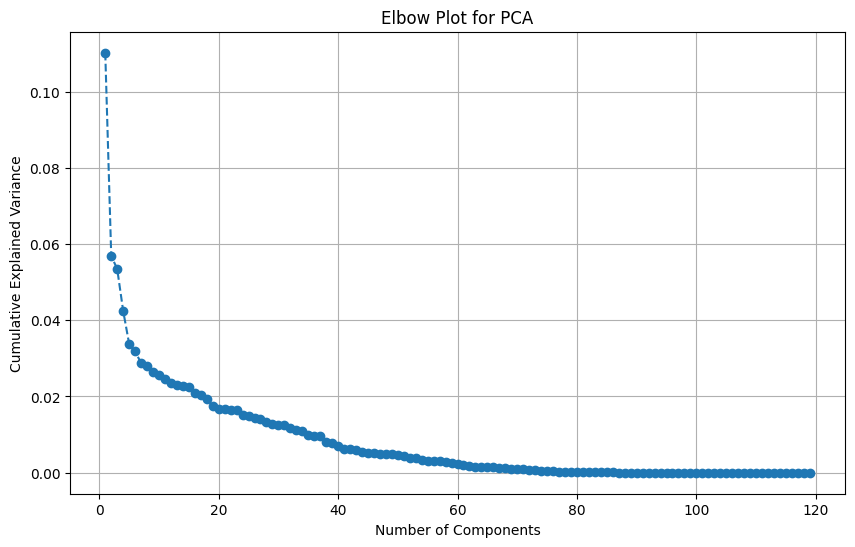

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Plot for PCA')
plt.grid()
plt.show()

In [ ]:
n_comp = 40 # Opted 40 components
pca_optimal_ori = PCA(n_components=n_comp, random_state=20)
pca_df = pca_optimal_ori.fit_transform(df_encoded)

total_explained_variance = sum(pca_optimal_ori.explained_variance_ratio_)

print(f"The optimal components explain {total_explained_variance * 100:.2f}% of the variance in the data.")

The optimal components explain 89.39% of the variance in the data.


In [ ]:
pca_deco_df = pd.DataFrame(data=pca_df, columns=['PCA_'+str(i+1) for i in range(n_comp)])
pca_deco_df['collision_severity_label'] = df['collision_severity_label']
pca_deco_df.to_csv('/content/drive/MyDrive/A_M_L/pca_df.csv', index=False)

## LDA Dataset

> LDA (Linear Discriminant Analysis) is another technique for dimensionality reduction and is mentioned as a separate step. Unlike PCA, LDA focuses on maximizing the separability among known categories. This suggests that the notebook explores different approaches to dimensionality reduction to determine which method best suits their clustering objectives.



In [ ]:
du_en = pd.DataFrame(data=df_encoded)
le = LabelEncoder()
du_en['collision_severity_label'] = le.fit_transform(df['collision_severity_label'])

In [ ]:
lda_optimal_ori = LinearDiscriminantAnalysis()
lda_df = lda_optimal_ori.fit_transform(df_encoded, du_en['collision_severity_label'])

In [ ]:
lda_deco_df = pd.DataFrame(data=lda_df, columns=['LDA_'+str(i+1) for i in range(lda_df.shape[1])])
lda_deco_df['collision_severity_label'] = df['collision_severity_label']

lda_deco_df.to_csv('/content/drive/MyDrive/A_M_L/lda_df.csv', index=False)

### Reviewing Attributes Distribution

> This step likely involves analyzing the distribution of the data, possibly to understand its characteristics better and to inform decisions on preprocessing or modeling. Understanding the distribution is essential for selecting appropriate clustering algorithms and parameters.




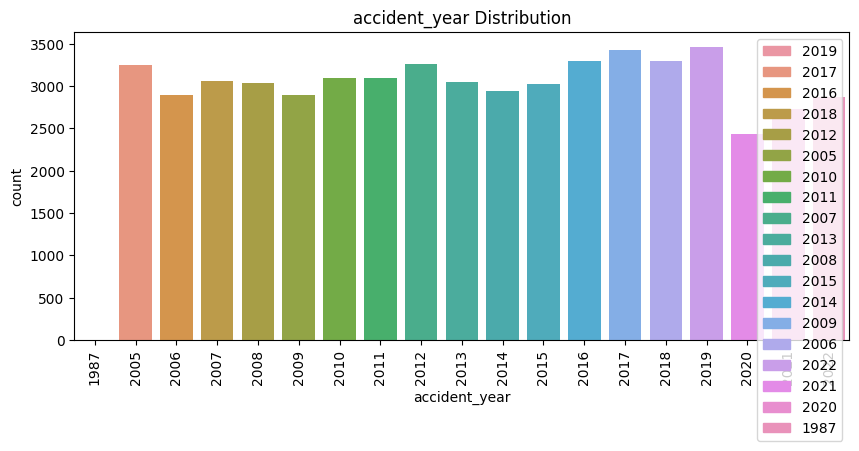

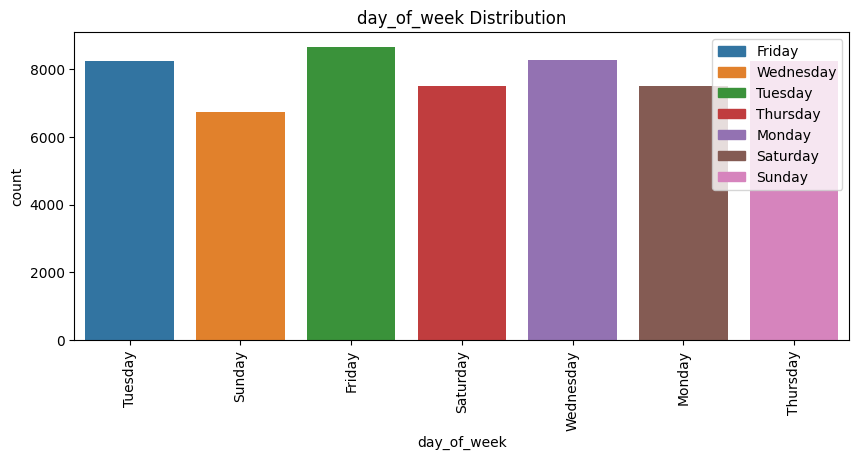

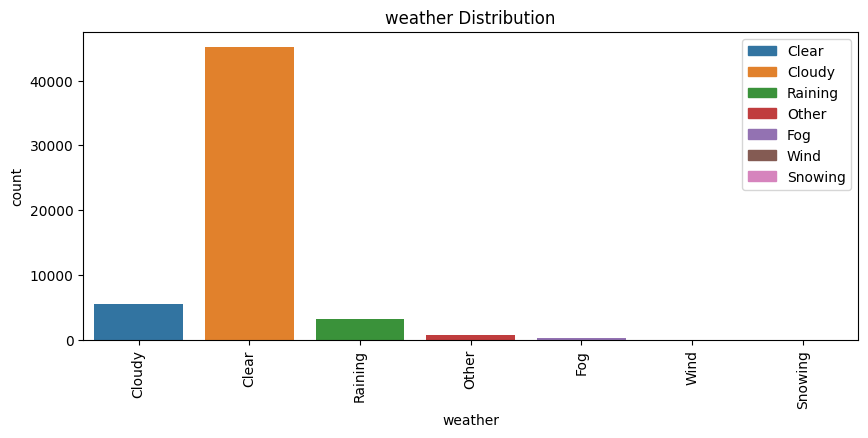

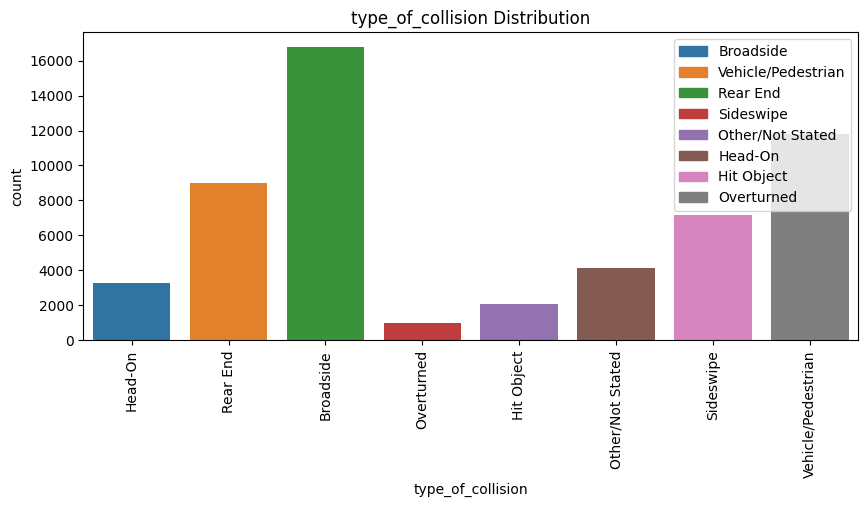

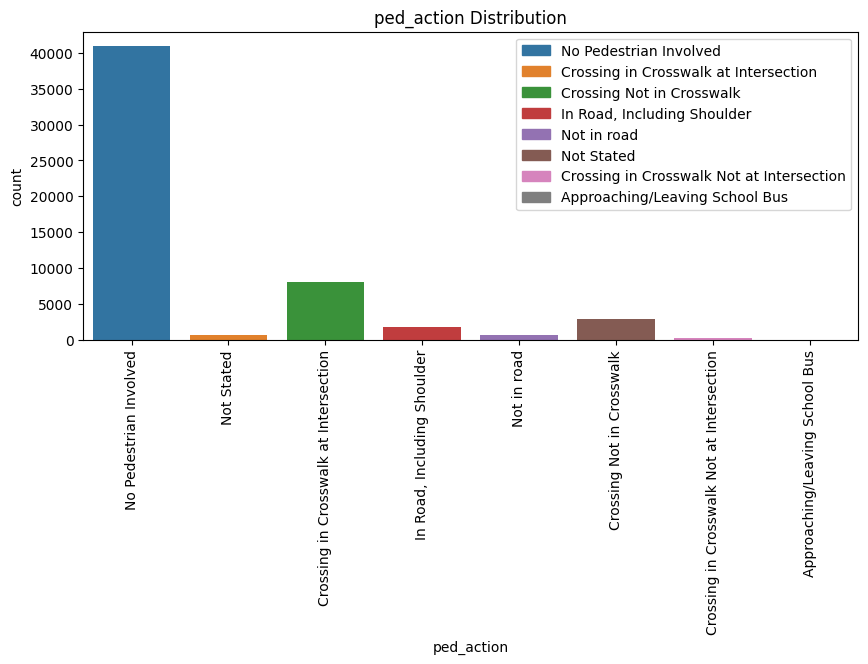

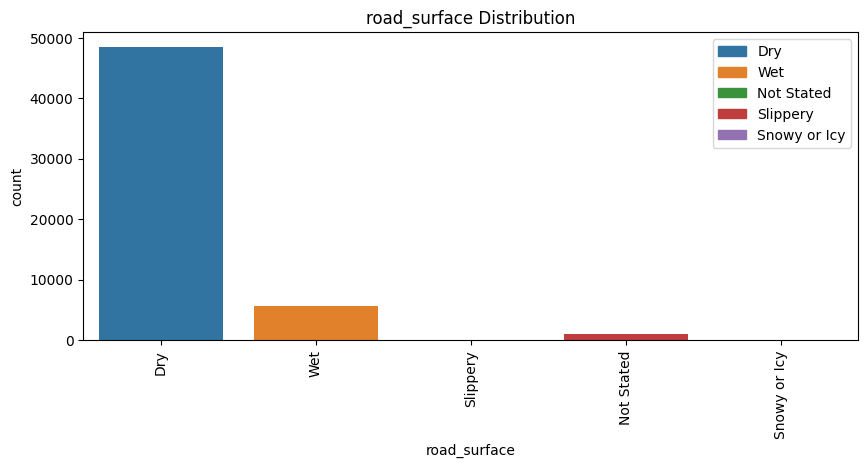

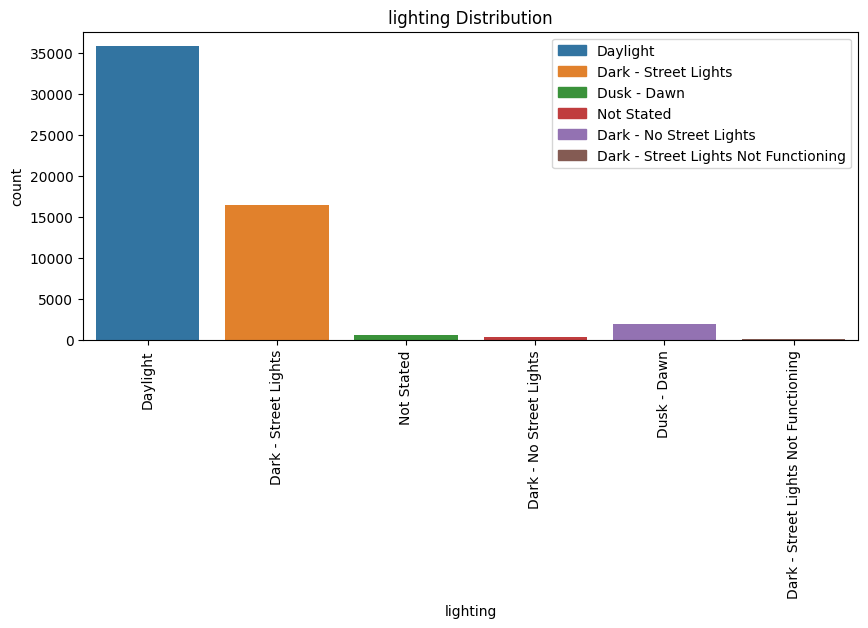

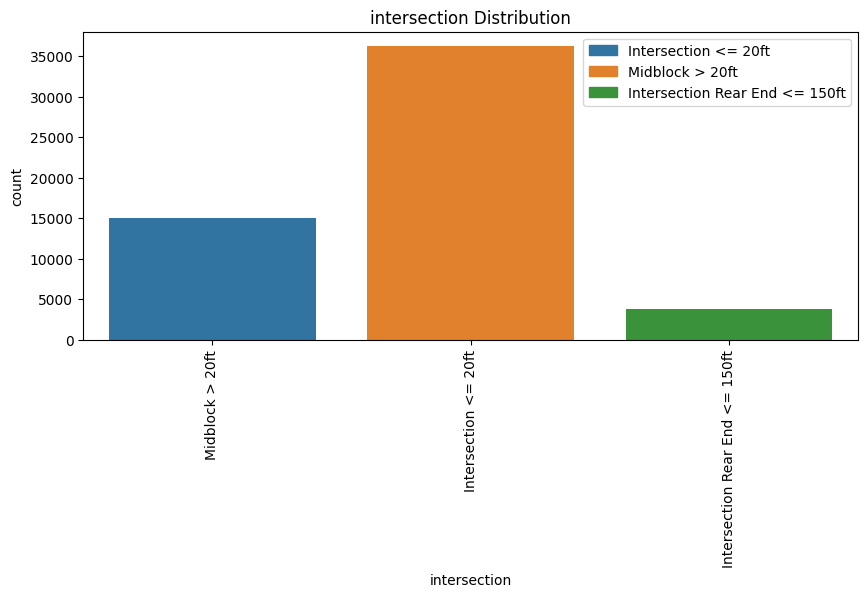

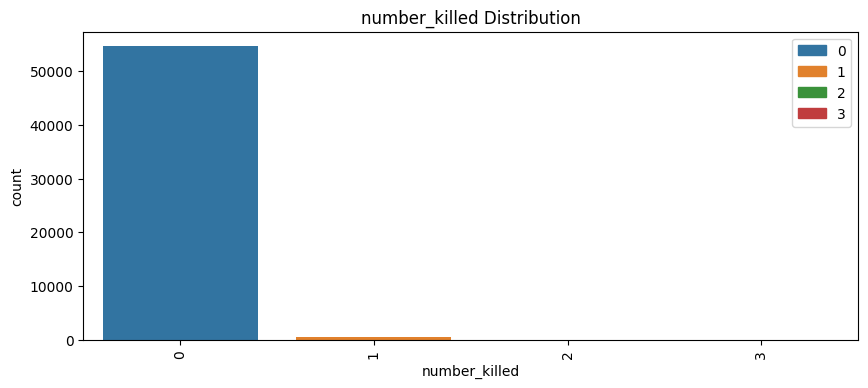

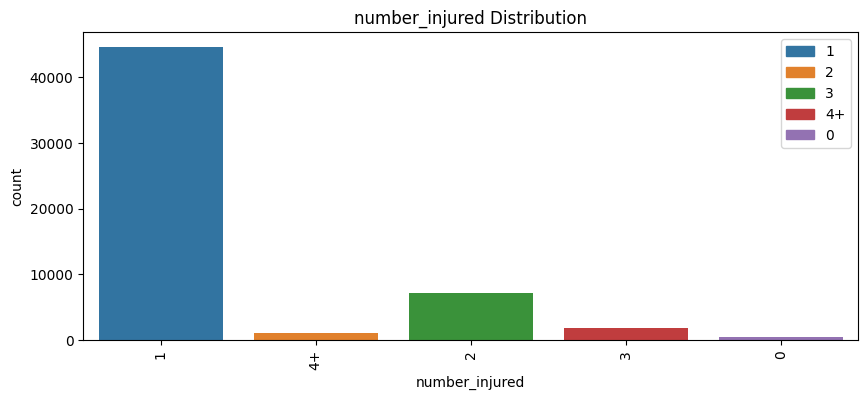

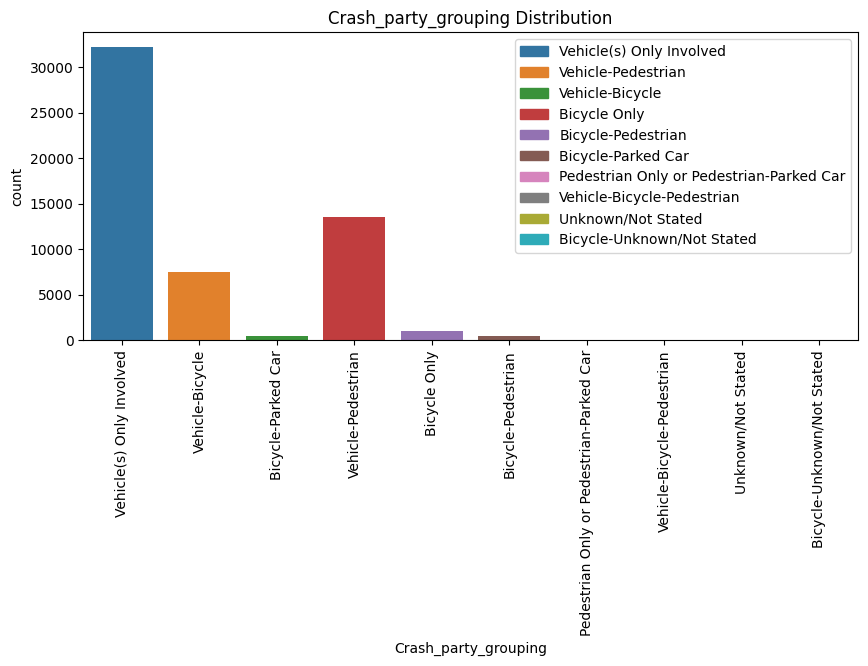

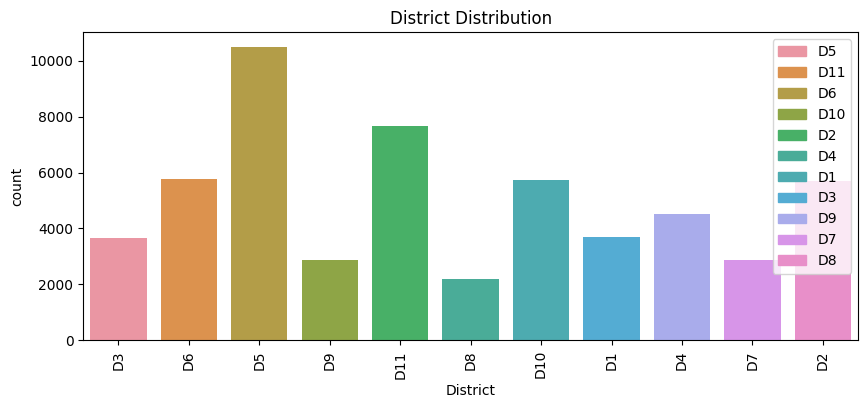

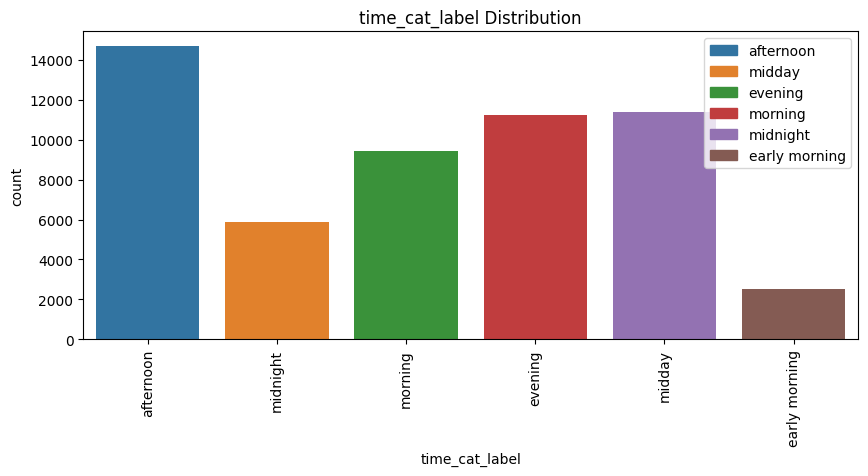

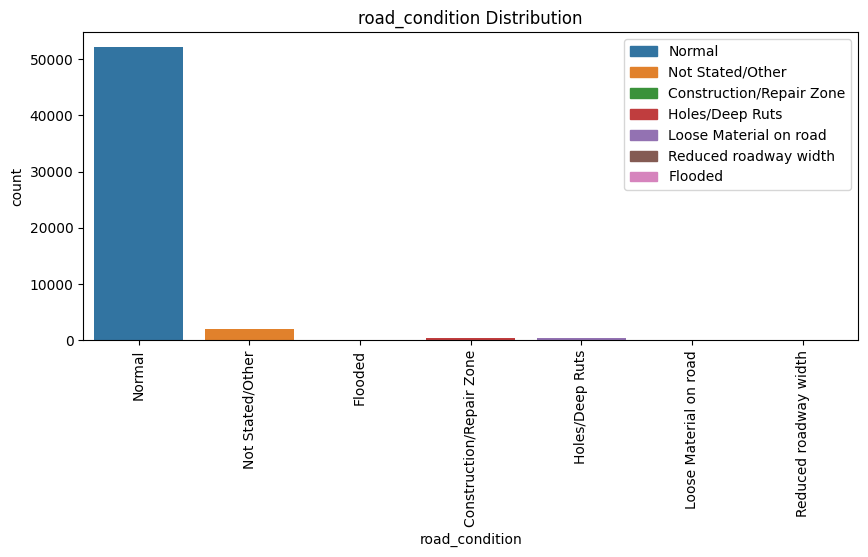

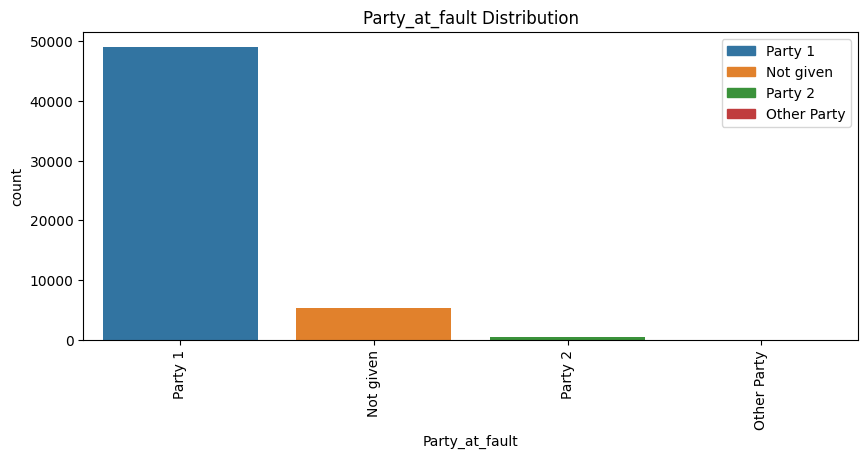

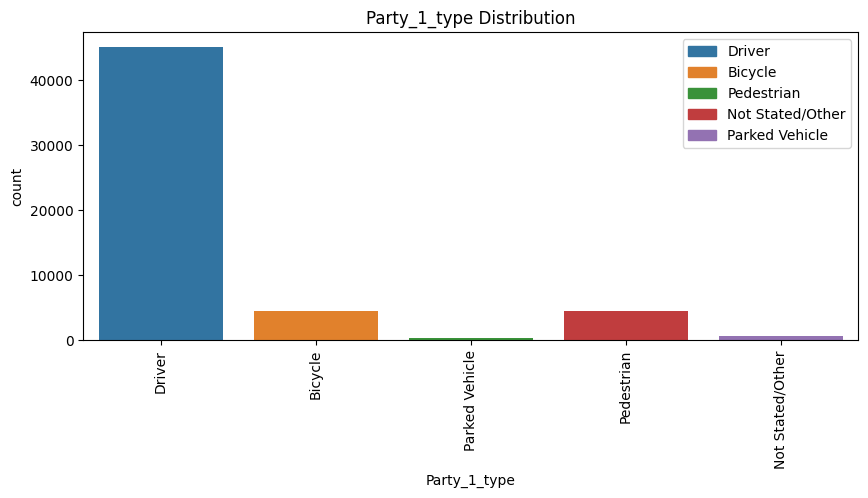

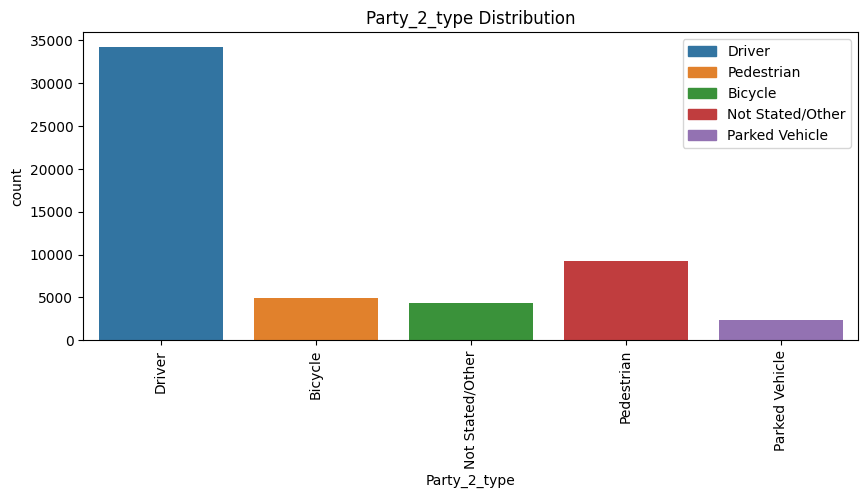

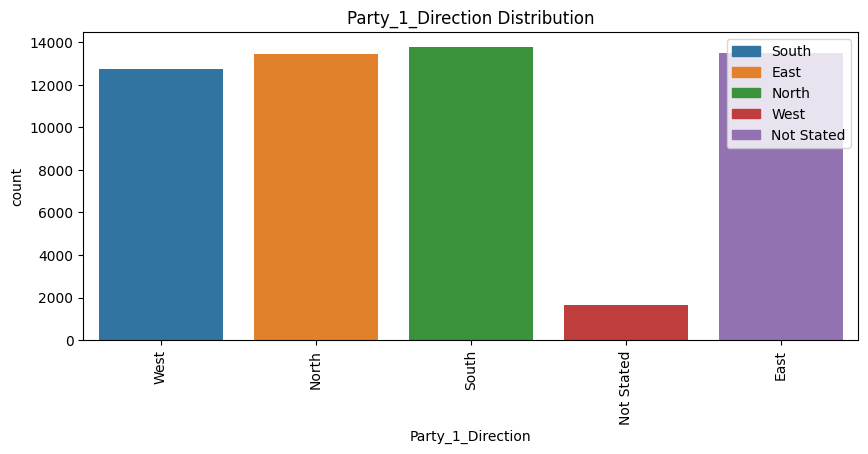

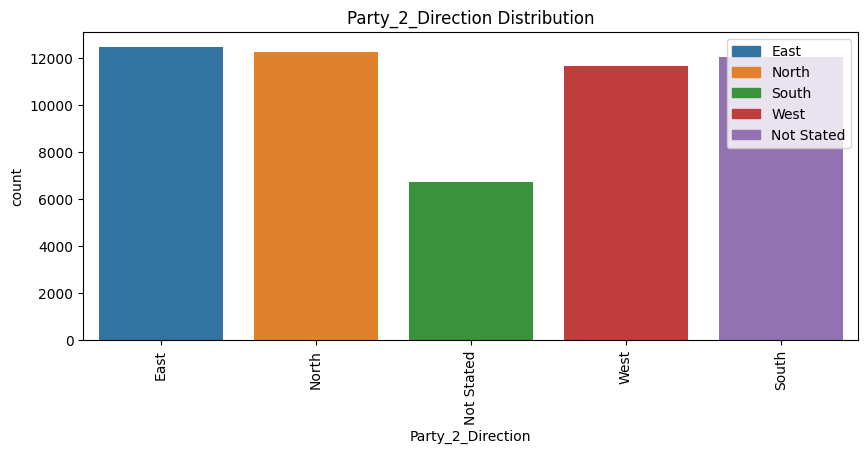

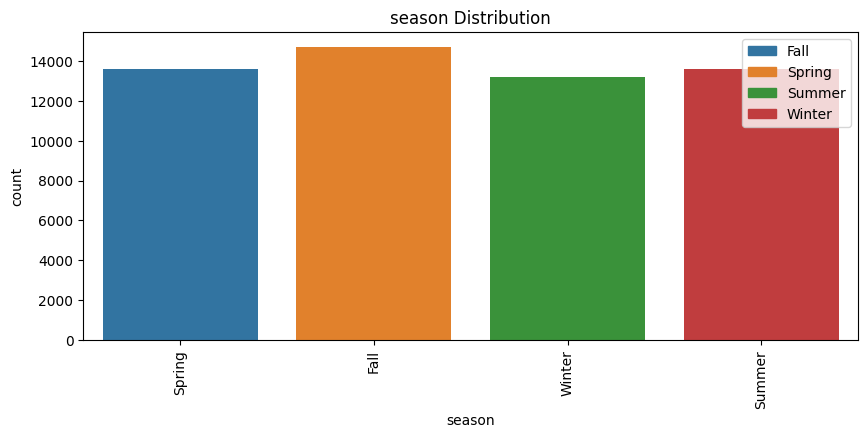

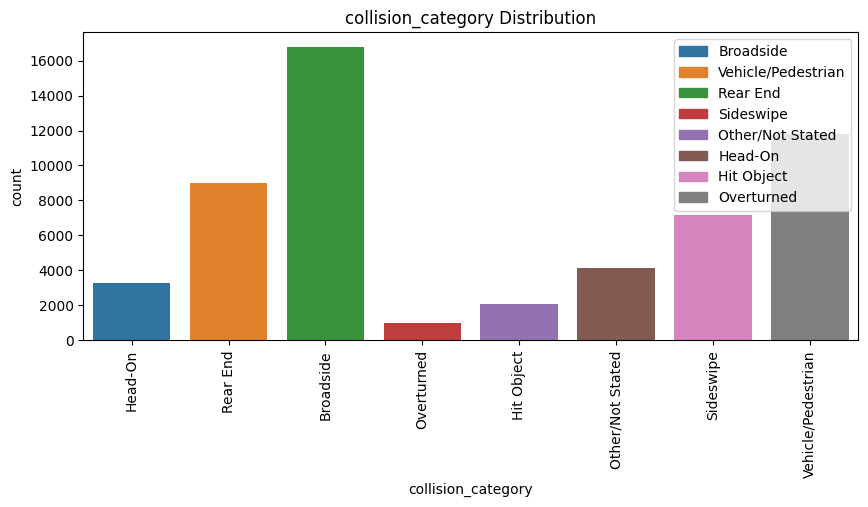

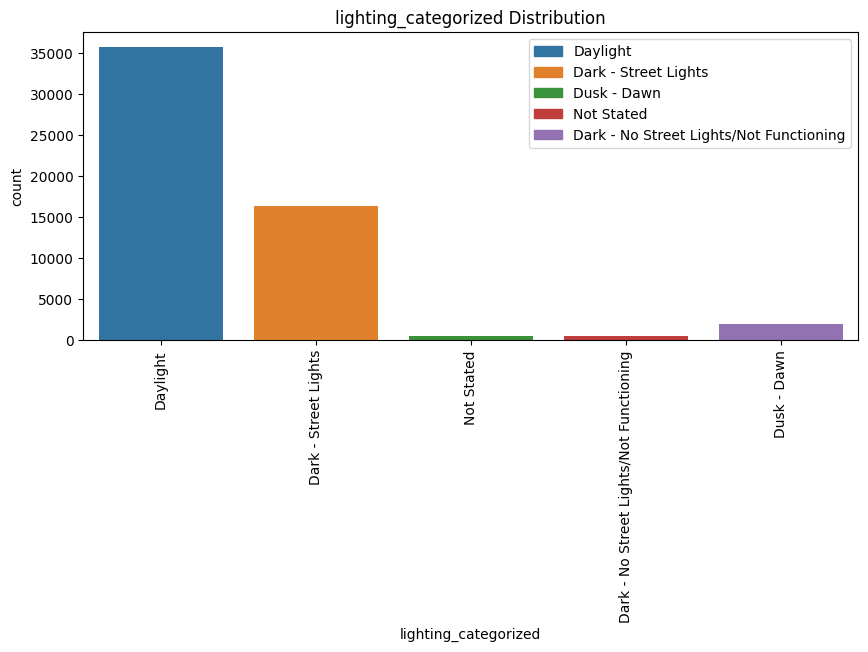

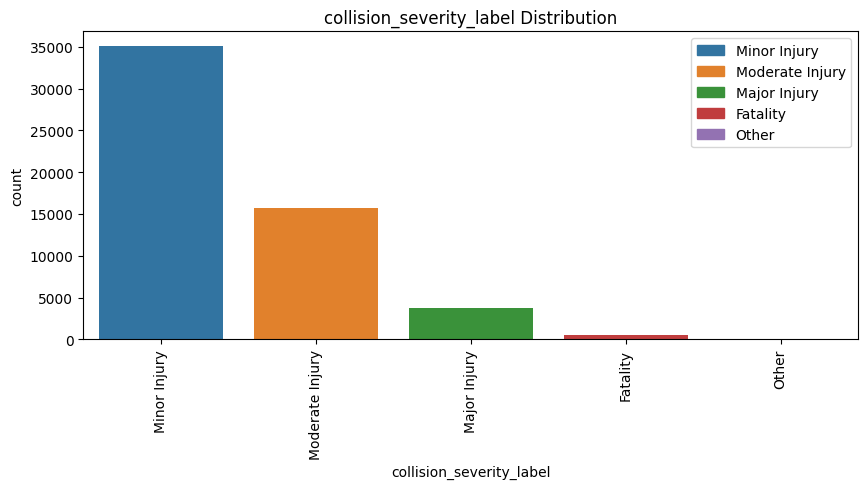

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# Assuming your dataset is in a Pandas DataFrame called "df"

# List of categorical columns
categorical_columns = [
    'accident_year', 'day_of_week', 'weather', 'type_of_collision',
    'ped_action', 'road_surface', 'lighting', 'intersection',
    'number_killed', 'number_injured', 'Crash_party_grouping',
    'District', 'time_cat_label', 'road_condition', 'Party_at_fault',
    'Party_1_type', 'Party_2_type', 'Party_1_Direction', 'Party_2_Direction',
    'season', 'collision_category', 'lighting_categorized', 'collision_severity_label'
]

# Loop through each categorical column and create a bar plot
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    ax = sns.countplot(x=col, data=df)
    plt.xticks(rotation=90)
    plt.title(f"{col} Distribution")

    # Create a custom legend
    categories = df[col].value_counts().index
    legend_patches = [mpatches.Patch(color=ax.get_children()[i].get_facecolor(), label=category) for i, category in enumerate(categories)]
    plt.legend(handles=legend_patches, loc='upper right')

    plt.show()

## **4.2 Clustering**

### Performing Clustring using above three datasets

> This broad section indicates the clustering, where different clustering techniques are applied to the dataset. Clustering is a method of unsupervised learning that groups similar data points together.



In [ ]:
# df_encoded
# pca_df
# lda_df

!pip install kneed
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans

def find_optimal_clusters(data, title):
    error = []

    for i in range(2, 20):
        kmeans1 = KMeans(n_clusters=i, random_state=20)
        kmeans1.fit(data)
        error.append(kmeans1.inertia_)

    # Finding the elbow of the graph using the kneed package
    optimalK = KneeLocator(
        range(2, 20),
        error,
        curve='convex',
        direction='decreasing',
        interp_method='interp1d',
    )

    print(f"\nNumber of clusters for {title}: {optimalK.elbow}")
    optimalK.plot_knee_normalized()
    plt.title(title)

    return optimalK.elbow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F


Number of clusters for Original Encoded Data: 8


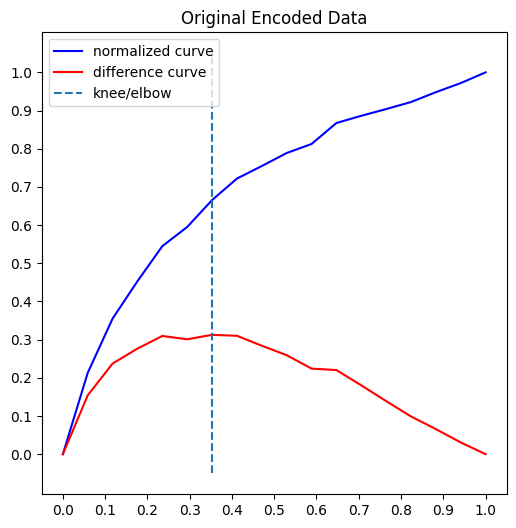

In [ ]:
optimal_clusters_std_scaled = find_optimal_clusters(df_encoded, 'Original Encoded Data')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F


Number of clusters for PCA Dataset: 8


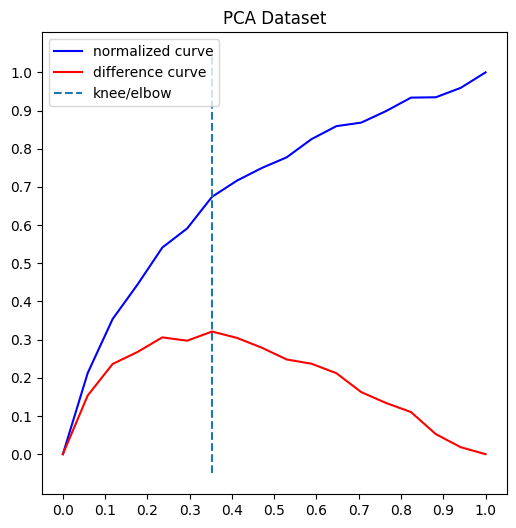

In [ ]:
optimal_clusters_std_scaled = find_optimal_clusters(pca_df, 'PCA Dataset')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F


Number of clusters for LDA Dataset: 6


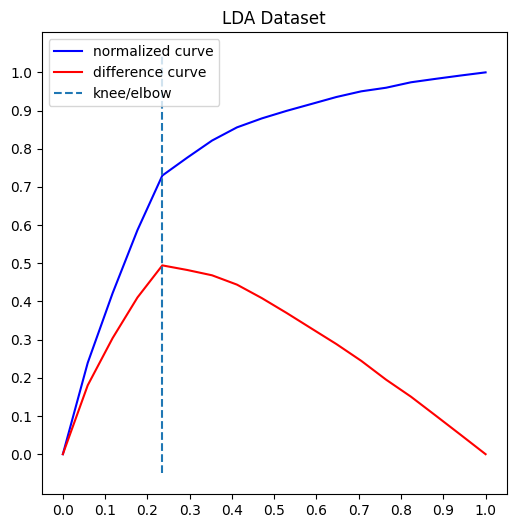

In [ ]:
optimal_clusters_std_scaled = find_optimal_clusters(lda_df, 'LDA Dataset')

## From the above Knee locator **graphs**, we decided to tune the cluster value from 6 to 10

### From the above Knee locators, we decided to tune the **cluster value from 6 to 10:**

> This step suggests the use of a knee locator method to determine the optimal number of clusters. The knee locator method helps identify a point in the plot of a certain metric (like within-cluster sum of squares) where the rate of decrease sharply changes, indicating an optimal cluster count. The decision to tune the cluster value between 6 and 10 is based on this analysis.



# K-Means Clustring

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

In [ ]:
def tune_kmeans(data):
    kmeans_pipe = Pipeline([
        ('kmeans', KMeans())
    ])

    kmeans_params = {
        'kmeans__n_clusters': range(6, 10),
        'kmeans__init': ['k-means++', 'random']
    }

    kmeans_grid = GridSearchCV(kmeans_pipe, kmeans_params, cv=5, scoring='neg_mean_squared_error')
    kmeans_grid.fit(data)

    return kmeans_grid.best_params_, kmeans_grid.best_estimator_


# DBSCAN

In [ ]:
def tune_dbscan(data):
    best_eps = None
    best_min_samples = None
    best_silhouette = -1

    for eps in np.arange(0.1, 1, 0.2):  # changed step size to 0.2
        for min_samples in range(5, 11, 2):  # changed step size to 2
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)
            if len(set(labels)) > 1:
                silhouette = silhouette_score(data, labels)
                if silhouette > best_silhouette:
                    best_silhouette = silhouette
                    best_eps = eps
                    best_min_samples = min_samples

    if best_eps is None:
        best_eps = 0.5

    if best_min_samples is None:
        best_min_samples = 5

    return DBSCAN(eps=best_eps, min_samples=best_min_samples)



# Expectation Maximization

In [ ]:
def tune_em(data):
    em_pipe = Pipeline([
        ('em', GaussianMixture())
    ])

    em_params = {
        'em__n_components': range(6, 10),
        'em__covariance_type': ['full', 'tied', 'diag', 'spherical']
    }

    em_grid = GridSearchCV(em_pipe, em_params, cv=3, scoring='neg_mean_squared_error')
    em_grid.fit(data)

    return em_grid.best_params_, em_grid.best_estimator_



# Agglomerative Clustering

In [ ]:
def tune_agglomerative(data):
    best_n_clusters = None
    best_score = -np.inf

    for n_clusters in range(6, 10, 2):  # changed step size to 2
        agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
        labels = agglomerative.fit_predict(data)
        score = silhouette_score(data, labels)

        if score > best_score:
            best_n_clusters = n_clusters
            best_score = score

    return {'n_clusters': best_n_clusters}, AgglomerativeClustering(n_clusters=best_n_clusters)



## **4.2.1 Hyper-Parameter Tuning**

### For K-Means, DBSCAN, EM, and Agglomerative Clustering: These sections probably detail the process of optimizing the hyper-parameters for each of the clustering algorithms applied to all the datasets (Original Encoded, PCA, LDA). Hyper-parameter tuning is crucial for improving the performance and accuracy of clustering models.

In [ ]:
def perform_clustering(data, kmeans_best, dbscan_best, em_best, agglomerative_best):
    kmeans_labels = kmeans_best.fit_predict(data)
    dbscan_labels = dbscan_best.fit_predict(data)
    em_labels = em_best.fit_predict(data)
    agglomerative_labels = agglomerative_best.fit_predict(data)

    return kmeans_labels, dbscan_labels, em_labels, agglomerative_labels

In [ ]:
# Create a dictionary to store the clustering results for each dataset

# df_encoded, 'Original Encoded Data'
# pca_df, 'PCA Dataset'
# lda_df, 'LDA Dataset'

results = {}

datasets = {
    'Original Encoded Data': df_encoded,
    'PCA Dataset': pca_df,
    'LDA Dataset': lda_df
}

## 4.2.1.1. Hyper-Parameter Tuning for K-Means for all the dataset

In [ ]:
from numpy.random import seed
for name, data in datasets.items():
    kmeans_params, kmeans_best = tune_kmeans(data)

    print(f"Dataset: {name}")
    print("Best k-Means parameters:", kmeans_params)
    print("\n")


    # Store the clustering results for each dataset in the results dictionary
    results[name] = {
        'kmeans': kmeans_best
    }


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/

Dataset: Original Encoded Data
Best k-Means parameters: {'kmeans__init': 'k-means++', 'kmeans__n_clusters': 6}




/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/

Dataset: PCA Dataset
Best k-Means parameters: {'kmeans__init': 'k-means++', 'kmeans__n_clusters': 6}




/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/

Dataset: LDA Dataset
Best k-Means parameters: {'kmeans__init': 'k-means++', 'kmeans__n_clusters': 6}




## 4.2.1.2. Hyper-Parameter Tuning for DBSCAN for all the dataset

In [ ]:
for name, data in datasets.items():

  dbscan_best = tune_dbscan(data)

  print(f"Dataset: {name}")
  print("Best DBSCAN parameters:", dbscan_best.get_params())
  print("\n")


  # Store the clustering results for each dataset in the results dictionary
  results[name].update({
      'dbscan': dbscan_best
  })


Dataset: Original Encoded Data
Best DBSCAN parameters: {'algorithm': 'auto', 'eps': 0.1, 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'min_samples': 5, 'n_jobs': None, 'p': None}


Dataset: PCA Dataset
Best DBSCAN parameters: {'algorithm': 'auto', 'eps': 0.9000000000000001, 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'min_samples': 9, 'n_jobs': None, 'p': None}


Dataset: LDA Dataset
Best DBSCAN parameters: {'algorithm': 'auto', 'eps': 0.7000000000000001, 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'min_samples': 9, 'n_jobs': None, 'p': None}




## 4.2.1.3. Hyper-Parameter Tuning for EM for all the dataset

In [ ]:
for name, data in datasets.items():
  print(f"Tuning for dataset: {name}")
  em_params, em_best = tune_em(data)

  print(f"Dataset: {name}")
  print("Best EM parameters:", em_params)
  print("\n")

  # Store the clustering results for each dataset in the results dictionary
  results[name].update({
      'em_best': em_best
  })


Tuning for dataset: Original Encoded Data


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_s

Dataset: Original Encoded Data
Best EM parameters: {'em__covariance_type': 'full', 'em__n_components': 6}


Tuning for dataset: PCA Dataset


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_s

Dataset: PCA Dataset
Best EM parameters: {'em__covariance_type': 'full', 'em__n_components': 6}


Tuning for dataset: LDA Dataset


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_s

Dataset: LDA Dataset
Best EM parameters: {'em__covariance_type': 'full', 'em__n_components': 6}




## 4.2.1.4. Hyper-Parameter Tuning for Agglomerative for all the dataset

In [ ]:
for name, data in datasets.items():
  print(f"Tuning for dataset: {name}")
  agglomerative_params, agglomerative_best = tune_agglomerative(data)

  print(f"Dataset: {name}")
  print("Best Agglomerative parameters:", agglomerative_params)
  print("\n")

    # Store the clustering results for each dataset in the results dictionary
  results[name].update({
      'agglomerative_best': agglomerative_best
  })

Tuning for dataset: Original Encoded Data
Dataset: Original Encoded Data
Best Agglomerative parameters: {'n_clusters': 8}


Tuning for dataset: PCA Dataset
Dataset: PCA Dataset
Best Agglomerative parameters: {'n_clusters': 6}


Tuning for dataset: LDA Dataset
Dataset: LDA Dataset
Best Agglomerative parameters: {'n_clusters': 6}




In [ ]:
results

{'Original Encoded Data': {'kmeans': Pipeline(steps=[('kmeans', KMeans(n_clusters=6))]),
  'dbscan': DBSCAN(eps=0.1),
  'em_best': Pipeline(steps=[('em', GaussianMixture(n_components=6))]),
  'agglomerative_best': AgglomerativeClustering(n_clusters=8)},
 'PCA Dataset': {'kmeans': Pipeline(steps=[('kmeans', KMeans(n_clusters=6))]),
  'dbscan': DBSCAN(eps=0.9000000000000001, min_samples=9),
  'em_best': Pipeline(steps=[('em', GaussianMixture(n_components=6))]),
  'agglomerative_best': AgglomerativeClustering(n_clusters=6)},
 'LDA Dataset': {'kmeans': Pipeline(steps=[('kmeans', KMeans(n_clusters=6))]),
  'dbscan': DBSCAN(eps=0.7000000000000001, min_samples=9),
  'em_best': Pipeline(steps=[('em', GaussianMixture(n_components=6))]),
  'agglomerative_best': AgglomerativeClustering(n_clusters=6)}}

### ***Perform clustering with the best parameters for each dataset***

In [ ]:
def perform_clustering_with_best_models(data, best_models):
    kmeans_labels = best_models['kmeans'].fit_predict(data)
    dbscan_labels = best_models['dbscan'].fit_predict(data)
    em_labels = best_models['em_best'].fit_predict(data)
    agglomerative_labels = best_models['agglomerative_best'].fit_predict(data)

    return kmeans_labels, dbscan_labels, em_labels, agglomerative_labels



In [ ]:
# Perform clustering with the best parameters for each dataset
for name, data in datasets.items():
    kmeans_labels, dbscan_labels, em_labels, agglomerative_labels = perform_clustering_with_best_models(
        data, results[name]
    )

    # Store the clustering results for each dataset in the results dictionary
    results[name].update({
        'kmeans_labels': kmeans_labels,
        'dbscan_labels': dbscan_labels,
        'em_labels': em_labels,
        'agglomerative_labels': agglomerative_labels
    })


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Note: Since the model took more than 8 hours to generate clusters, we saved all the clusters by creating **pickle file**

In [ ]:
import pickle

# Save the clustering results to a file
def save_results(results, filename):
    with open(filename, 'wb') as f:
        pickle.dump(results, f)



# Save the clustering results
save_results(results, '/content/drive/MyDrive/A_M_L/clustering_results.pickle')


In [ ]:
# Load the clustering results from a pickle file
def load_results(filename):
    with open(filename, 'rb') as f:
        results = pickle.load(f)
    return results

# Load the clustering results
results = load_results('/content/drive/MyDrive/A_M_L/clustering_results.pickle')


In [ ]:
results

{'Original Encoded Data': {'kmeans': Pipeline(steps=[('kmeans', KMeans(n_clusters=6))]),
  'dbscan': DBSCAN(eps=0.1),
  'em_best': Pipeline(steps=[('em', GaussianMixture(n_components=6))]),
  'agglomerative_best': AgglomerativeClustering(n_clusters=8),
  'kmeans_labels': array([0, 3, 4, ..., 0, 2, 4], dtype=int32),
  'dbscan_labels': array([-1, -1, -1, ..., -1, -1, -1]),
  'em_labels': array([2, 5, 4, ..., 3, 3, 4]),
  'agglomerative_labels': array([7, 0, 0, ..., 4, 2, 2])},
 'PCA Dataset': {'kmeans': Pipeline(steps=[('kmeans', KMeans(n_clusters=6))]),
  'dbscan': DBSCAN(eps=0.9000000000000001, min_samples=9),
  'em_best': Pipeline(steps=[('em', GaussianMixture(n_components=6))]),
  'agglomerative_best': AgglomerativeClustering(n_clusters=6),
  'kmeans_labels': array([2, 4, 4, ..., 4, 0, 0], dtype=int32),
  'dbscan_labels': array([-1, -1, -1, ..., -1, -1, -1]),
  'em_labels': array([0, 3, 5, ..., 3, 1, 2]),
  'agglomerative_labels': array([2, 3, 0, ..., 2, 0, 0])},
 'LDA Dataset': {'km

## 4.2.2. **Clustering Visualization** with

### **Original Encoded Dataset** using best parameters

In [ ]:
labels = df['collision_severity_label']

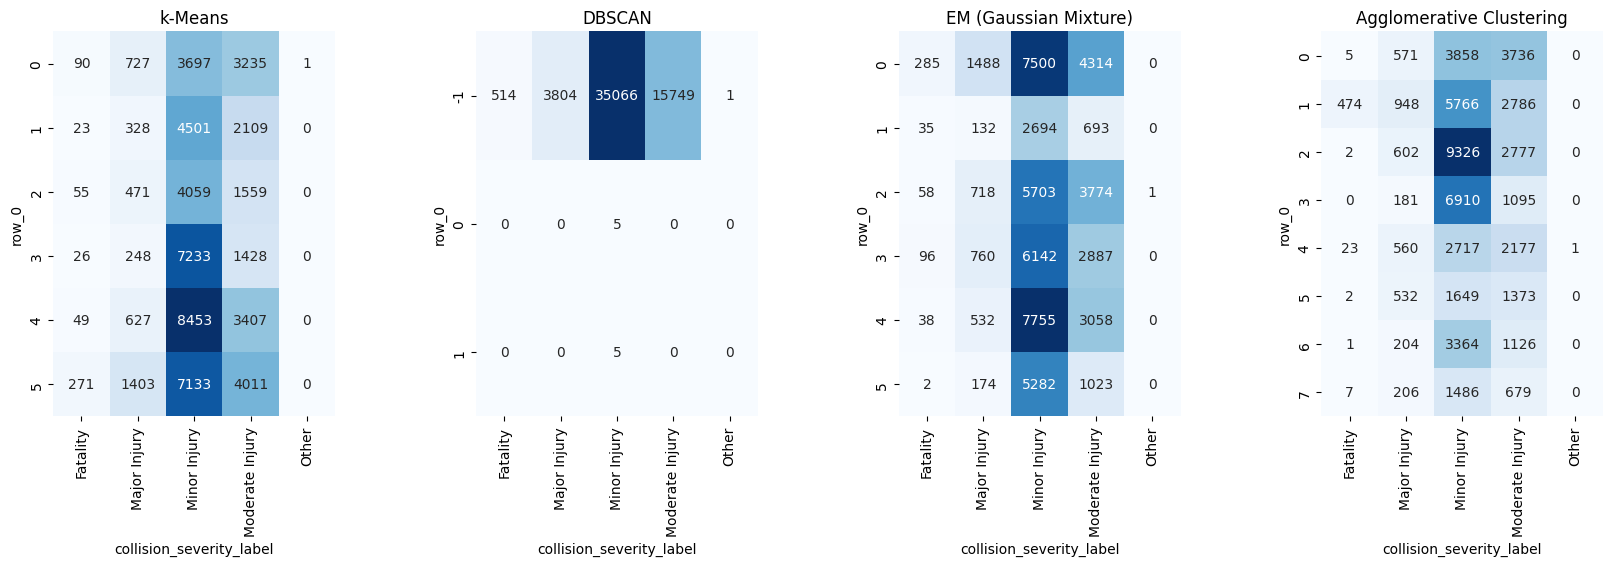

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Retrieve the clustering labels from the 'results' dictionary
kmeans_labels = results['Original Encoded Data']['kmeans_labels']
dbscan_labels = results['Original Encoded Data']['dbscan_labels']
em_labels = results['Original Encoded Data']['em_labels']
agglomerative_labels = results['Original Encoded Data']['agglomerative_labels']

# Create a crosstab of the clustering labels and the 'collision_severity_label' column
kmeans_ct = pd.crosstab(kmeans_labels, labels)
dbscan_ct = pd.crosstab(dbscan_labels, labels)
em_ct = pd.crosstab(em_labels, labels)
agglomerative_ct = pd.crosstab(agglomerative_labels, labels)

# Plot the heatmaps for each clustering algorithm side by side
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), gridspec_kw={'width_ratios': [1, 1, 1, 1], 'wspace': 0.5})

sns.heatmap(kmeans_ct, cmap="Blues", annot=True, fmt="d", ax=axes[0], cbar=False)
axes[0].set_title("k-Means")

sns.heatmap(dbscan_ct, cmap="Blues", annot=True, fmt="d", ax=axes[1], cbar=False)
axes[1].set_title("DBSCAN")

sns.heatmap(em_ct, cmap="Blues", annot=True, fmt="d", ax=axes[2], cbar=False)
axes[2].set_title("EM (Gaussian Mixture)")

sns.heatmap(agglomerative_ct, cmap="Blues", annot=True, fmt="d", ax=axes[3], cbar=False)
axes[3].set_title("Agglomerative Clustering")

plt.show()


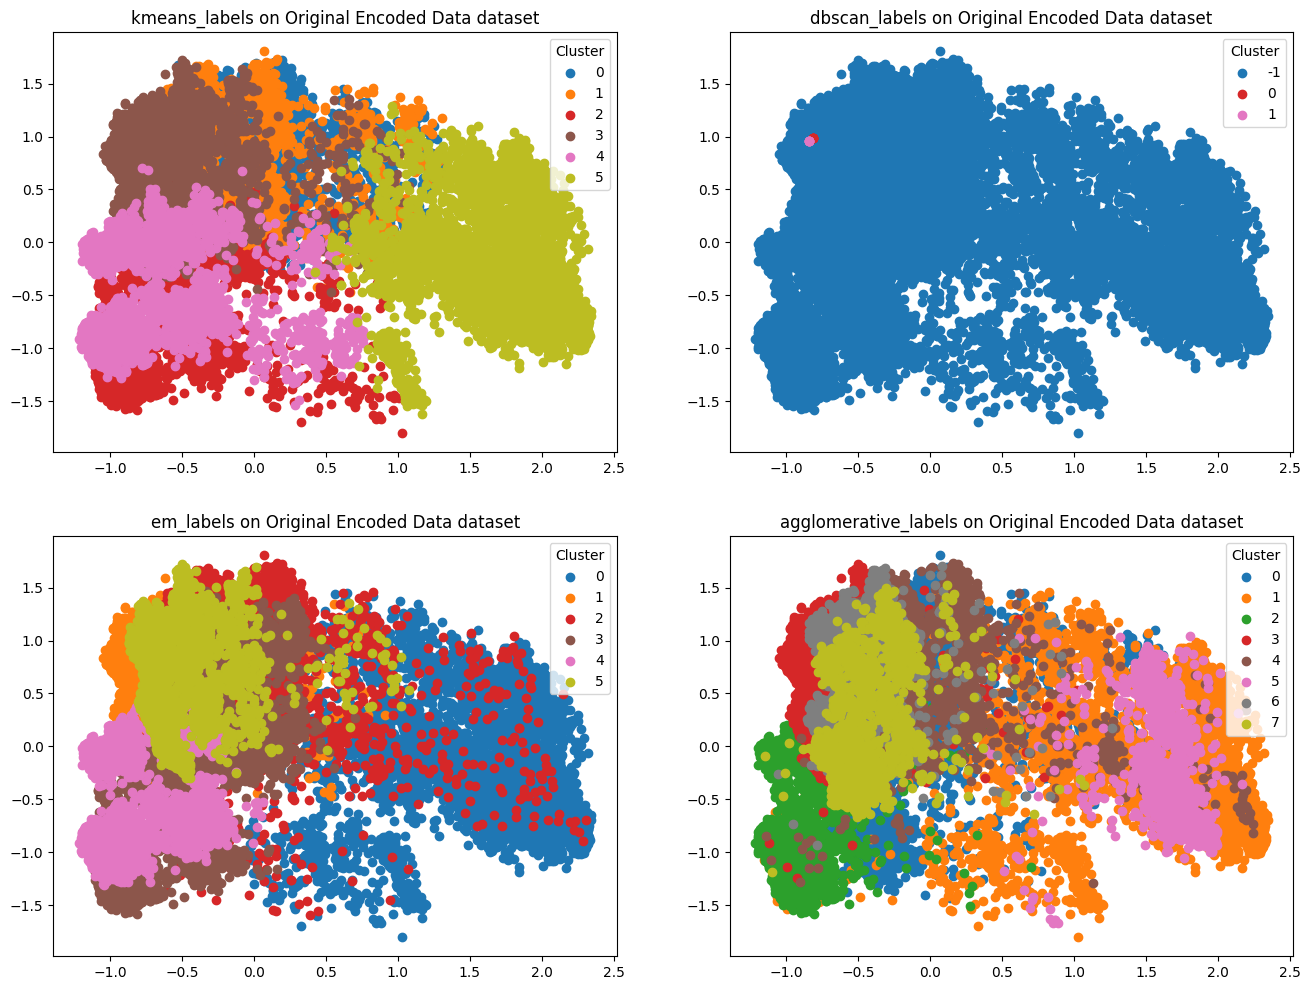

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def plot_clusters_2d_subplot(ax, data, labels, title, cmap='tab10'):
    unique_labels = np.unique(labels)
    label_colors = {label: plt.get_cmap(cmap)(i / len(unique_labels)) for i, label in enumerate(unique_labels)}

    for label in unique_labels:
        ax.scatter(data[labels == label, 0], data[labels == label, 1], c=[label_colors[label]], label=label)

    ax.set_title(title)
    ax.legend(title='Cluster')

# Perform PCA on the std_scaled dataset
pca = PCA(n_components=2)
std_scaled_pca_2d = pca.fit_transform(df_encoded)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Plot the clusters for each clustering method on the std_scaled dataset
methods = ['kmeans_labels', 'dbscan_labels', 'em_labels', 'agglomerative_labels']
for i, method in enumerate(methods):
    row = i // 2
    col = i % 2
    labels = results['Original Encoded Data'][method]
    plot_clusters_2d_subplot(axes[row, col], std_scaled_pca_2d, labels, f'{method} on Original Encoded Data dataset')

plt.show()



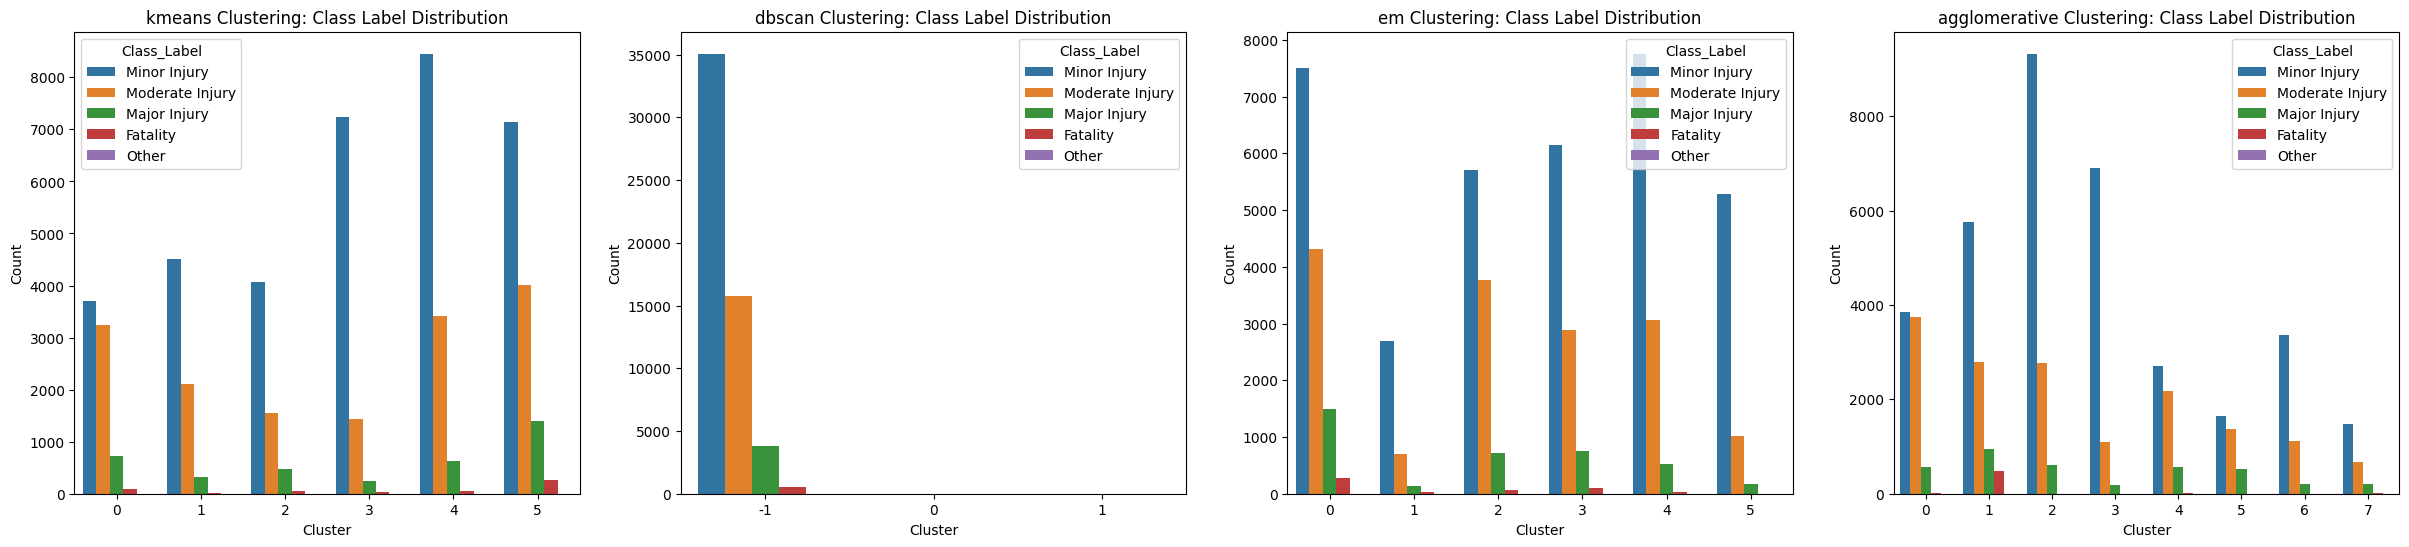

In [ ]:
import seaborn as sns

def visualize_clusters(ax, data, clustering_labels, algorithm_name, class_label_column):
    # Create a temporary DataFrame to store both the clustering labels and the class labels
    temp_df = pd.DataFrame({'Cluster': clustering_labels, 'Class_Label': class_label_column})

    # Plot the distribution of class labels within each cluster
    sns.countplot(x='Cluster', hue='Class_Label', data=temp_df, ax=ax)
    ax.set_title(f'{algorithm_name} Clustering: Class Label Distribution')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Count')

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 6))

# Visualize clustering results for the 'df_encoded' dataset
std_scaled_class_labels = df['collision_severity_label']
for i, (algorithm, labels_key) in enumerate([('kmeans', 'kmeans_labels'), ('dbscan', 'dbscan_labels'), ('em', 'em_labels'), ('agglomerative', 'agglomerative_labels')]):
    visualize_clusters(axes[i], df_encoded, results['Original Encoded Data'][labels_key], algorithm, std_scaled_class_labels)

plt.show()



### **PCA Dataset** using best parameters

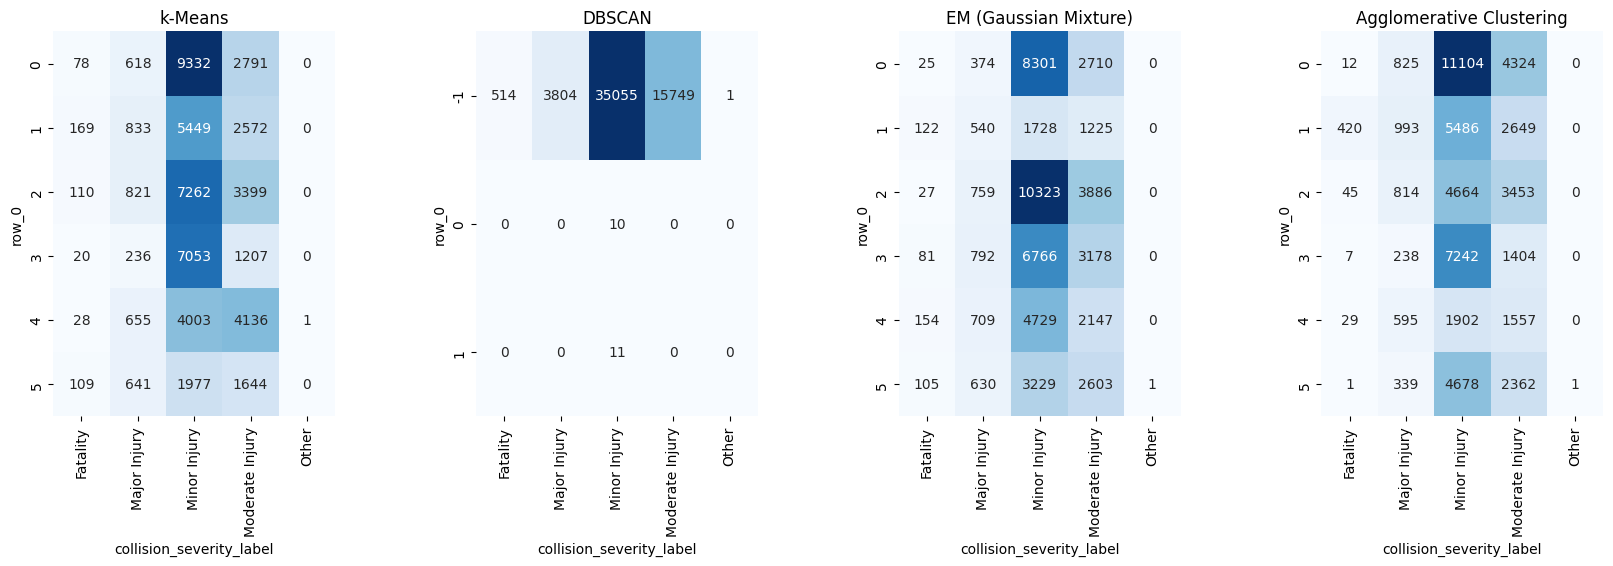

In [ ]:
labels = df['collision_severity_label']
# Retrieve the clustering labels from the 'results' dictionary
kmeans_labels = results['PCA Dataset']['kmeans_labels']
dbscan_labels = results['PCA Dataset']['dbscan_labels']
em_labels = results['PCA Dataset']['em_labels']
agglomerative_labels = results['PCA Dataset']['agglomerative_labels']

# Create a crosstab of the clustering labels and the 'collision_severity_label' column
kmeans_ct = pd.crosstab(kmeans_labels, labels)
dbscan_ct = pd.crosstab(dbscan_labels, labels)
em_ct = pd.crosstab(em_labels, labels)
agglomerative_ct = pd.crosstab(agglomerative_labels, labels)

# Plot the heatmaps for each clustering algorithm side by side
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), gridspec_kw={'width_ratios': [1, 1, 1, 1], 'wspace': 0.5})

sns.heatmap(kmeans_ct, cmap="Blues", annot=True, fmt="d", ax=axes[0], cbar=False)
axes[0].set_title("k-Means")

sns.heatmap(dbscan_ct, cmap="Blues", annot=True, fmt="d", ax=axes[1], cbar=False)
axes[1].set_title("DBSCAN")

sns.heatmap(em_ct, cmap="Blues", annot=True, fmt="d", ax=axes[2], cbar=False)
axes[2].set_title("EM (Gaussian Mixture)")

sns.heatmap(agglomerative_ct, cmap="Blues", annot=True, fmt="d", ax=axes[3], cbar=False)
axes[3].set_title("Agglomerative Clustering")

plt.show()


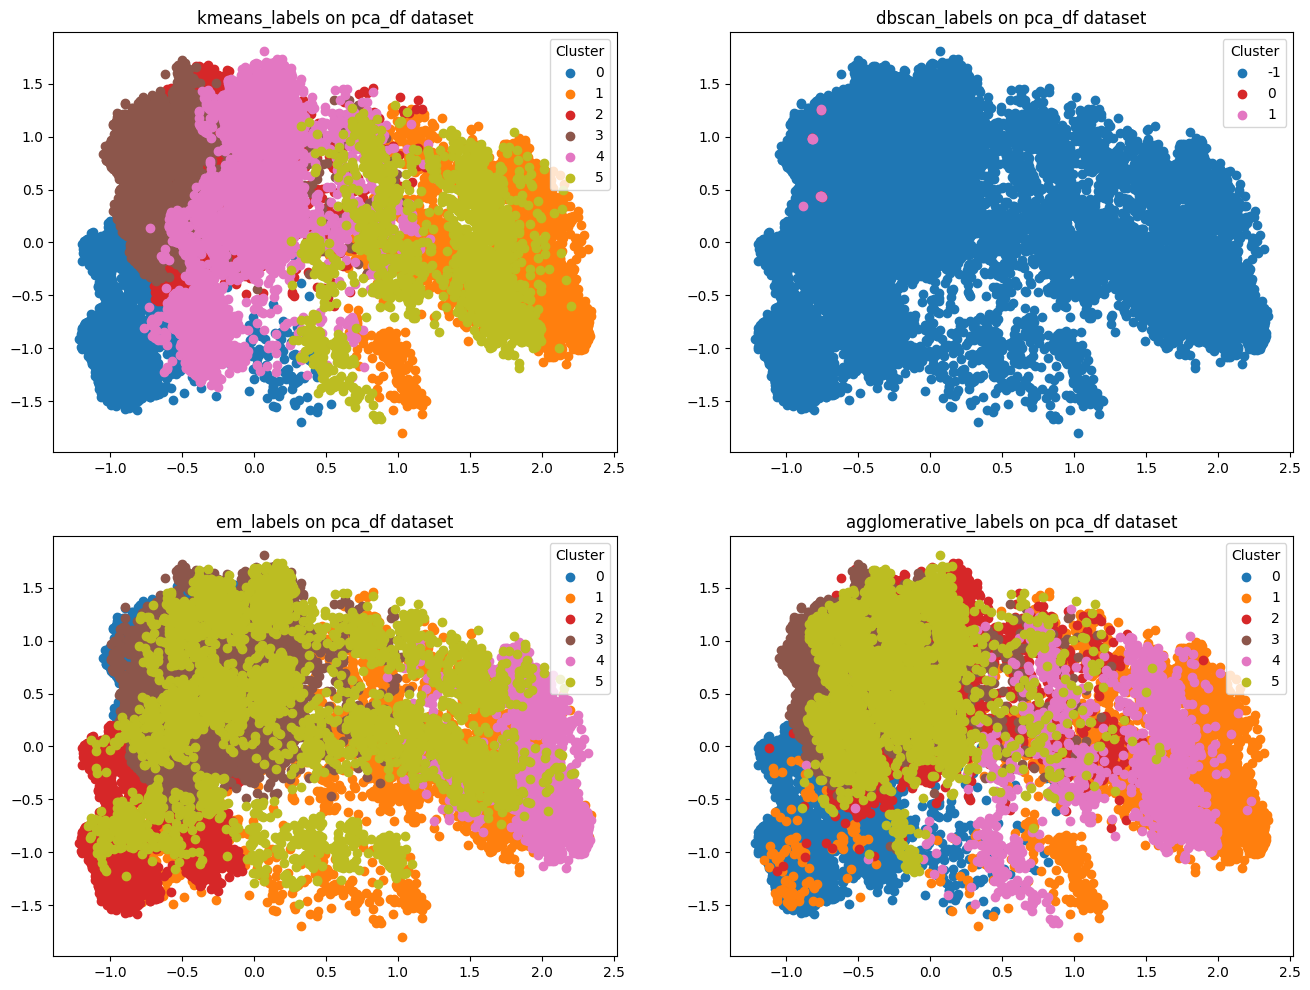

In [ ]:
def plot_clusters_2d_subplot(ax, data, labels, title, cmap='tab10'):
    unique_labels = np.unique(labels)
    label_colors = {label: plt.get_cmap(cmap)(i / len(unique_labels)) for i, label in enumerate(unique_labels)}

    for label in unique_labels:
        ax.scatter(data[labels == label, 0], data[labels == label, 1], c=[label_colors[label]], label=label)

    ax.set_title(title)
    ax.legend(title='Cluster')

# Perform PCA on the PCA Dataset
pca = PCA(n_components=2)
std_scaled_pca_2d = pca.fit_transform(pca_df)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Plot the clusters for each clustering method on the PCA Dataset
methods = ['kmeans_labels', 'dbscan_labels', 'em_labels', 'agglomerative_labels']
for i, method in enumerate(methods):
    row = i // 2
    col = i % 2
    labels = results['PCA Dataset'][method]
    plot_clusters_2d_subplot(axes[row, col], std_scaled_pca_2d, labels, f'{method} on pca_df dataset')

plt.show()

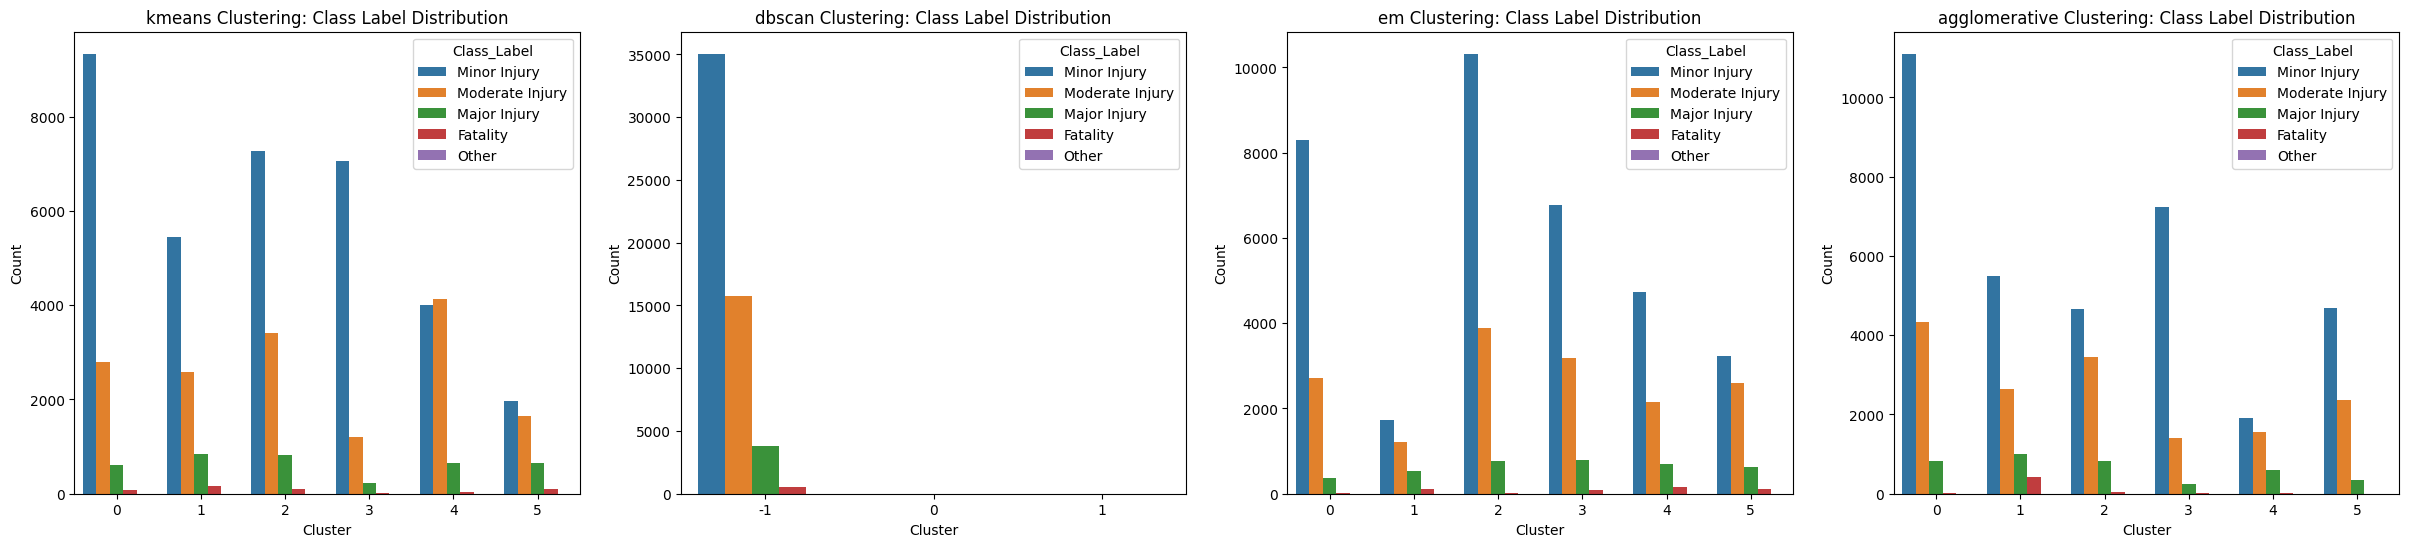

In [ ]:
def visualize_clusters(ax, data, clustering_labels, algorithm_name, class_label_column):
    # Create a temporary DataFrame to store both the clustering labels and the class labels
    temp_df = pd.DataFrame({'Cluster': clustering_labels, 'Class_Label': class_label_column})

    # Plot the distribution of class labels within each cluster
    sns.countplot(x='Cluster', hue='Class_Label', data=temp_df, ax=ax)
    ax.set_title(f'{algorithm_name} Clustering: Class Label Distribution')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Count')

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 6))

# Visualize clustering results for the PCA Dataset
std_scaled_class_labels = df['collision_severity_label']
for i, (algorithm, labels_key) in enumerate([('kmeans', 'kmeans_labels'), ('dbscan', 'dbscan_labels'), ('em', 'em_labels'), ('agglomerative', 'agglomerative_labels')]):
    visualize_clusters(axes[i], pca_df, results['PCA Dataset'][labels_key], algorithm, std_scaled_class_labels)

plt.show()

### **LDA Dataset** using best parameters

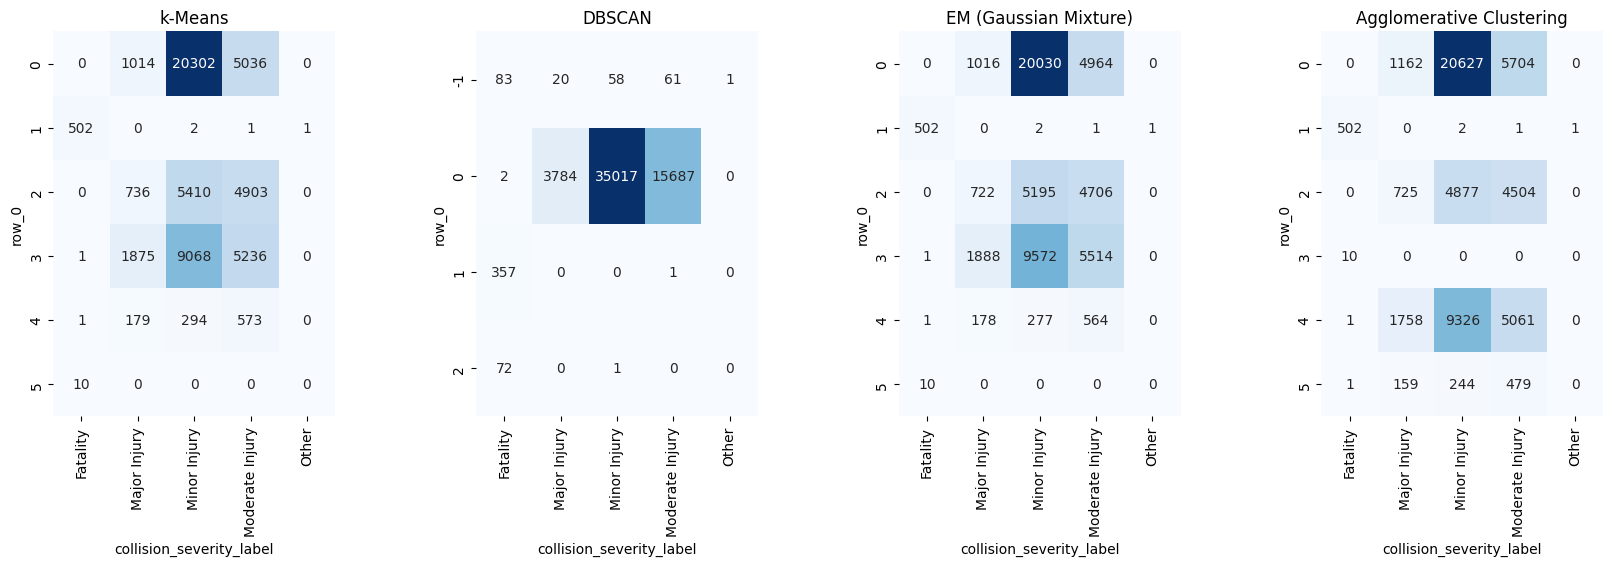

In [ ]:
# Retrieve the clustering labels from the 'results' dictionary
labels = df['collision_severity_label']
kmeans_labels = results['LDA Dataset']['kmeans_labels']
dbscan_labels = results['LDA Dataset']['dbscan_labels']
em_labels = results['LDA Dataset']['em_labels']
agglomerative_labels = results['LDA Dataset']['agglomerative_labels']

# Create a crosstab of the clustering labels and the 'collision_severity_label' column
kmeans_ct = pd.crosstab(kmeans_labels, labels)
dbscan_ct = pd.crosstab(dbscan_labels, labels)
em_ct = pd.crosstab(em_labels, labels)
agglomerative_ct = pd.crosstab(agglomerative_labels, labels)

# Plot the heatmaps for each clustering algorithm side by side
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), gridspec_kw={'width_ratios': [1, 1, 1, 1], 'wspace': 0.5})

sns.heatmap(kmeans_ct, cmap="Blues", annot=True, fmt="d", ax=axes[0], cbar=False)
axes[0].set_title("k-Means")

sns.heatmap(dbscan_ct, cmap="Blues", annot=True, fmt="d", ax=axes[1], cbar=False)
axes[1].set_title("DBSCAN")

sns.heatmap(em_ct, cmap="Blues", annot=True, fmt="d", ax=axes[2], cbar=False)
axes[2].set_title("EM (Gaussian Mixture)")

sns.heatmap(agglomerative_ct, cmap="Blues", annot=True, fmt="d", ax=axes[3], cbar=False)
axes[3].set_title("Agglomerative Clustering")

plt.show()

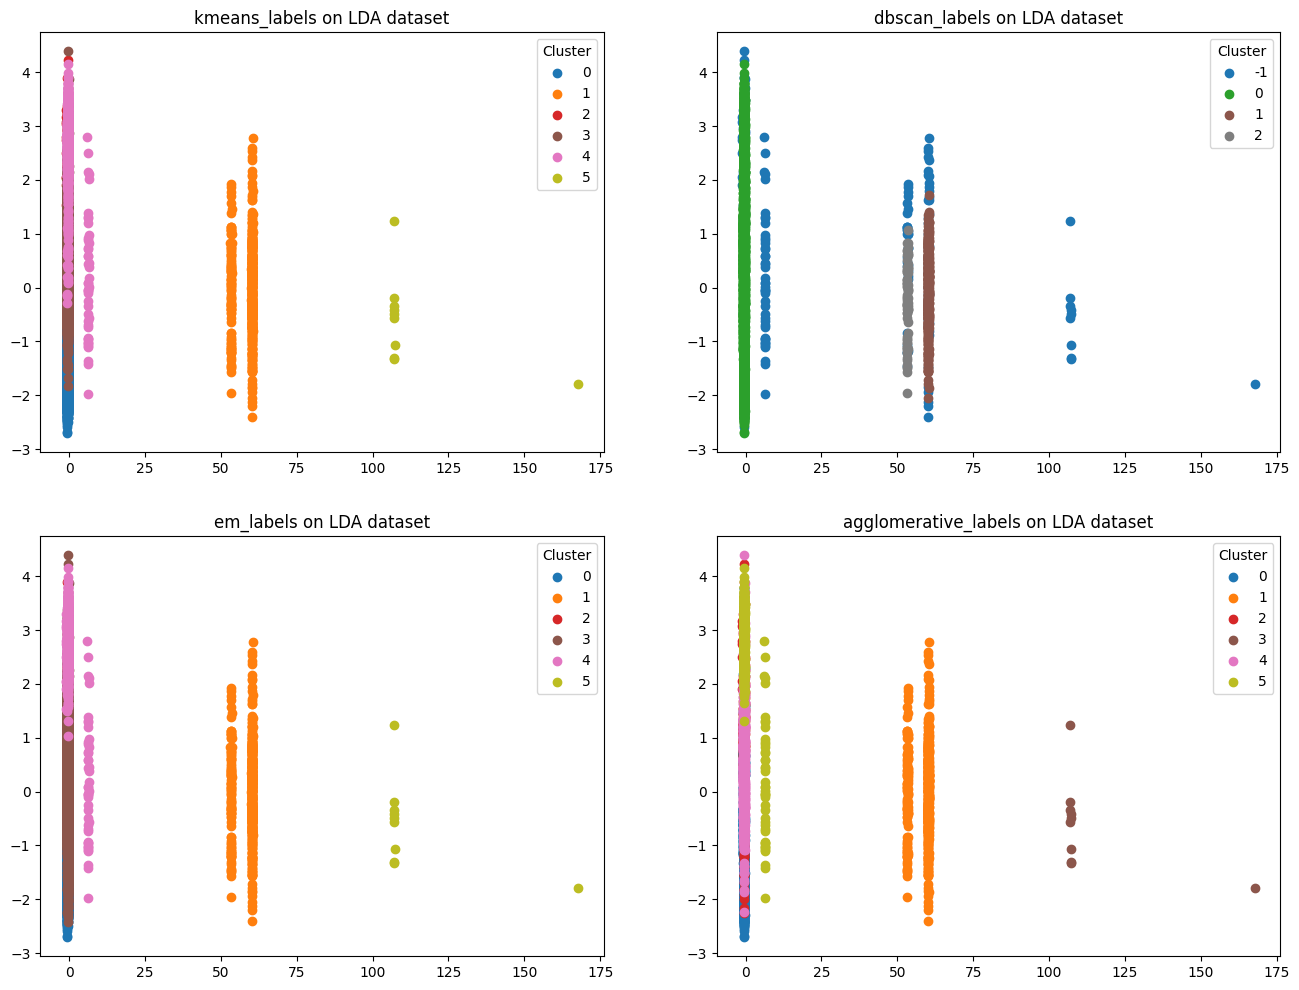

In [ ]:
def plot_clusters_2d_subplot(ax, data, labels, title, cmap='tab10'):
    unique_labels = np.unique(labels)
    label_colors = {label: plt.get_cmap(cmap)(i / len(unique_labels)) for i, label in enumerate(unique_labels)}

    for label in unique_labels:
        ax.scatter(data[labels == label, 0], data[labels == label, 1], c=[label_colors[label]], label=label)

    ax.set_title(title)
    ax.legend(title='Cluster')

# Perform PCA on the PCA Dataset
pca = PCA(n_components=2)
std_scaled_pca_2d = pca.fit_transform(lda_df)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Plot the clusters for each clustering method on the LDA Dataset
methods = ['kmeans_labels', 'dbscan_labels', 'em_labels', 'agglomerative_labels']
for i, method in enumerate(methods):
    row = i // 2
    col = i % 2
    labels = results['LDA Dataset'][method]
    plot_clusters_2d_subplot(axes[row, col], std_scaled_pca_2d, labels, f'{method} on LDA dataset')

plt.show()

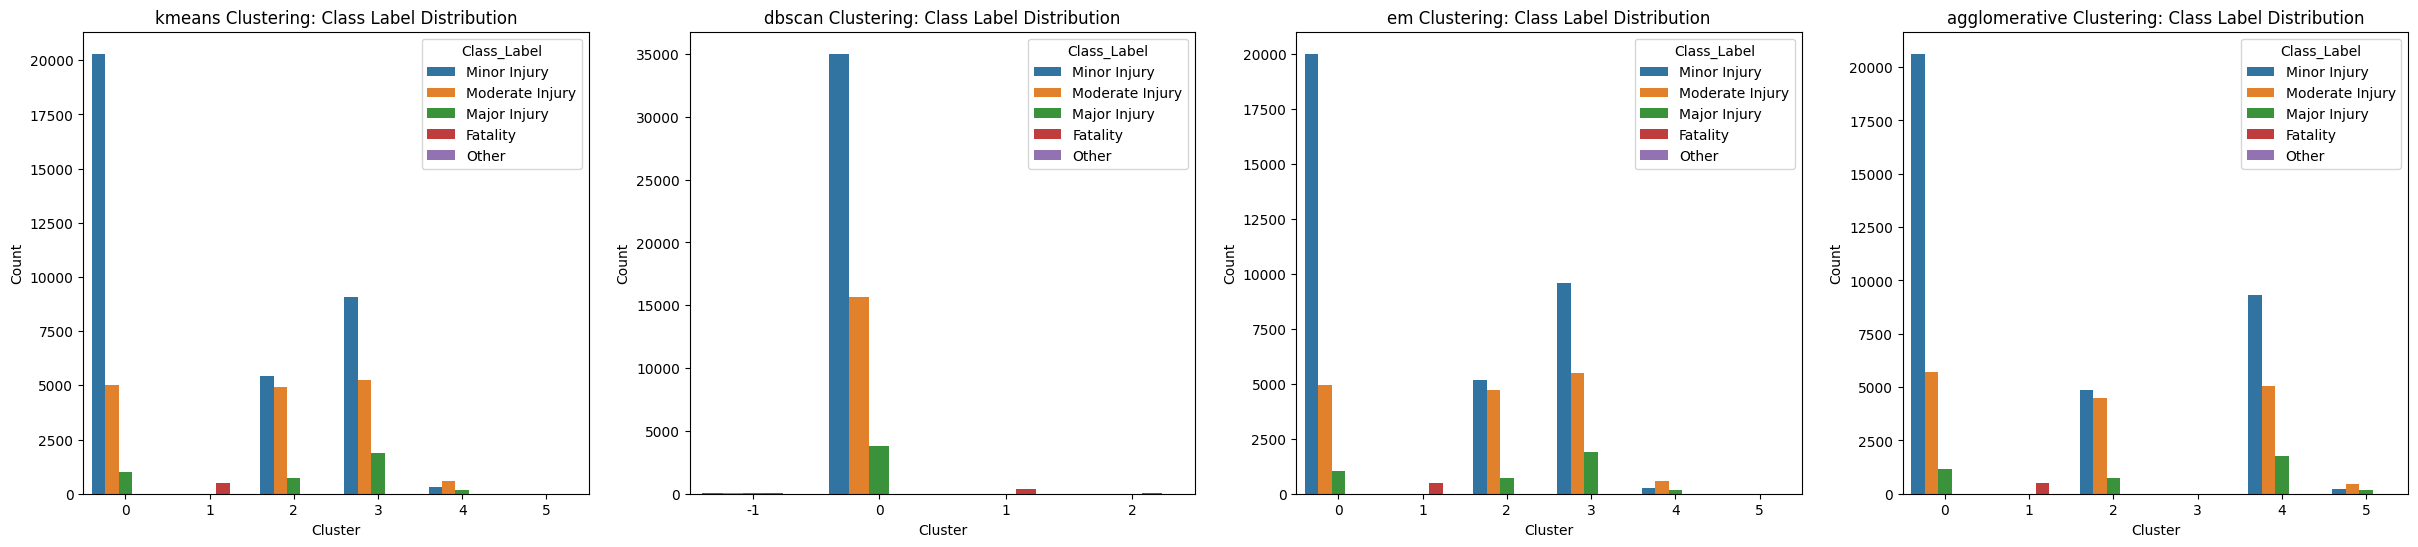

In [ ]:
def visualize_clusters(ax, data, clustering_labels, algorithm_name, class_label_column):
    # Create a temporary DataFrame to store both the clustering labels and the class labels
    temp_df = pd.DataFrame({'Cluster': clustering_labels, 'Class_Label': class_label_column})

    # Plot the distribution of class labels within each cluster
    sns.countplot(x='Cluster', hue='Class_Label', data=temp_df, ax=ax)
    ax.set_title(f'{algorithm_name} Clustering: Class Label Distribution')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Count')

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 6))

# Visualize clustering results for the LDA Dataset
std_scaled_class_labels = df['collision_severity_label']
for i, (algorithm, labels_key) in enumerate([('kmeans', 'kmeans_labels'), ('dbscan', 'dbscan_labels'), ('em', 'em_labels'), ('agglomerative', 'agglomerative_labels')]):
    visualize_clusters(axes[i], lda_df, results['LDA Dataset'][labels_key], algorithm, std_scaled_class_labels)

plt.show()

# 4.3 **Sampling and Modeling**

The clustering results addresses the issue of class imbalance, which can significantly affect the performance of classification models, by:

*   Highlighting the limitations of classifiers when dealing with categories that are too small, leading to potential errors or biases in model training.
*   Implementing Sampling Techniques: To counteract class imbalance, strategies for sampling are discussed, aiming to equalize the representation of different classes within the data. This includes the potential removal of categories that are not sufficiently represented.





In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
before_datasets = {
    'Original_Encoded_Data': (df_encoded, df['collision_severity_label']),
    'PCA_Dataset': (pca_df, df['collision_severity_label']),
    'LDA_Dataset': (lda_df, df['collision_severity_label'])
}

In [ ]:
classifiers = {
    'kNN': KNeighborsClassifier(n_neighbors=12),
    'DT': DecisionTreeClassifier(max_depth=None, random_state=42),
    'RF': RandomForestClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(kernel='rbf', C=1.0, random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), random_state=42)
}


## -> Classifiers will **NOT WORK** if any of the category is less than 2

## Example

In [ ]:
results = {}

for dataset_name, (X, y) in before_datasets.items():
    print(f"Dataset: {dataset_name}")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    results[dataset_name] = {}

    for classifier_name, classifier in classifiers.items():
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        cm = confusion_matrix(y_test, y_pred)

        print(f"{classifier_name} - Precision: {precision:.3f}, Recall: {recall:.3f}, Accuracy: {accuracy:.3f}, F1-score: {f1:.3f}")

        results[dataset_name][classifier_name] = {
            'precision': precision,
            'recall': recall,
            'accuracy': accuracy,
            'f1': f1,
            'confusion_matrix': cm
        }
    print("\n")

Dataset: Original_Encoded_Data


ValueError: ignored

## Dataset: Original_Encoded_Data

## **ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.**

# **4.3.1 Sampling**

## From the above clusters we came to know that other category is bias. Then we removed it, Also when we do sampling for the class imbalance there will be a change of more other get in.

## * Classifiers will not work if any of the category is less than 2

## The 'Other' category has only one instance, and it might not be representative of any pattern or trend. Therefore, it is reasonable to remove the 'Other' category before applying any sampling technique.

In [ ]:
from sklearn.preprocessing import LabelEncoder

filtered_df = df[df['collision_severity_label'] != 'Other']

In [ ]:
filtered_df.head(5)

,day_of_week,weather,type_of_collision,ped_action,road_surface,intersection,number_killed,number_injured,Crash_party_grouping,District,...,collision_severity_label,road_condition,Party_at_fault,Party_1_type,Party_2_type,Party_1_Direction,Party_2_Direction,season,collision_category,lighting_categorized
0,Tuesday,Cloudy,Head-On,No Pedestrian Involved,Dry,Midblock > 20ft,0,1,Vehicle(s) Only Involved,D3,...,Minor Injury,Normal,Party 1,Driver,Driver,West,East,Spring,Head-On,Daylight
1,Sunday,Clear,Rear End,No Pedestrian Involved,Dry,Intersection <= 20ft,0,1,Vehicle-Bicycle,D6,...,Minor Injury,Normal,Party 1,Driver,Bicycle,North,North,Fall,Rear End,Dark - Street Lights
2,Friday,Clear,Broadside,No Pedestrian Involved,Dry,Intersection <= 20ft,0,1,Vehicle-Bicycle,D5,...,Minor Injury,Normal,Not given,Bicycle,Driver,South,Not Stated,Winter,Broadside,Daylight
3,Saturday,Clear,Overturned,No Pedestrian Involved,Dry,Midblock > 20ft,0,1,Vehicle(s) Only Involved,D9,...,Moderate Injury,Normal,Party 1,Driver,Not Stated/Other,South,Not Stated,Fall,Overturned,Not Stated
4,Saturday,Clear,Hit Object,No Pedestrian Involved,Dry,Midblock > 20ft,0,1,Vehicle(s) Only Involved,D3,...,Minor Injury,Normal,Party 1,Driver,Not Stated/Other,West,Not Stated,Fall,Hit Object,Daylight


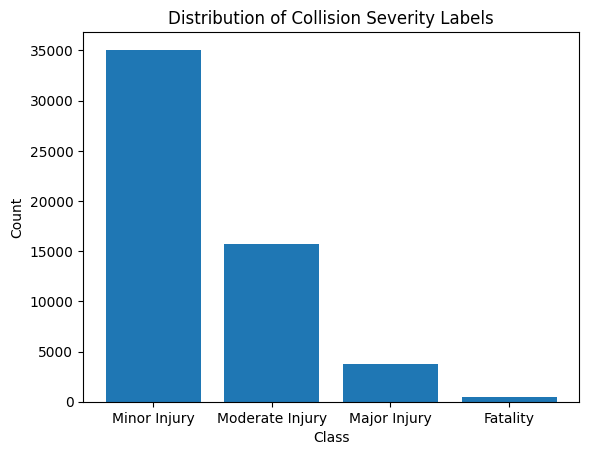

In [ ]:
class_counts = filtered_df['collision_severity_label'].value_counts()
labels = class_counts.index

plt.bar(labels, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Collision Severity Labels')
plt.show()

In [ ]:
class_counts.index

Index(['Minor Injury', 'Moderate Injury', 'Major Injury', 'Fatality'], dtype='object')

In [ ]:
# Prepare the dataset for SAMPLING
X = filtered_df.drop('collision_severity_label', axis=1)
y = filtered_df['collision_severity_label']

In [ ]:
# Encode the categorical features
le = LabelEncoder()
X = pd.get_dummies(X)

In [ ]:
X

,number_killed,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,weather_Clear,weather_Cloudy,...,collision_category_Other/Not Stated,collision_category_Overturned,collision_category_Rear End,collision_category_Sideswipe,collision_category_Vehicle/Pedestrian,lighting_categorized_Dark - No Street Lights/Not Functioning,lighting_categorized_Dark - Street Lights,lighting_categorized_Daylight,lighting_categorized_Dusk - Dawn,lighting_categorized_Not Stated
0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55139,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
55140,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
55141,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
55142,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


**Sampling Techniques:** to balance the class distribution.

1.   undersampling
2.   oversampling
3.   SMOTE



In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Undersample the majority class
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X, y)

# Oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_over, y_over = oversampler.fit_resample(X, y)

# Apply SMOTE technique
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [ ]:
y_under.value_counts()

Fatality           514
Major Injury       514
Minor Injury       514
Moderate Injury    514
Name: collision_severity_label, dtype: int64

In [ ]:
y_over.value_counts()

Minor Injury       35076
Moderate Injury    35076
Major Injury       35076
Fatality           35076
Name: collision_severity_label, dtype: int64

In [ ]:
y_smote.value_counts()

Minor Injury       35076
Moderate Injury    35076
Major Injury       35076
Fatality           35076
Name: collision_severity_label, dtype: int64

# **5. Modeling**



---



> This phase likely involves selecting and training various classifiers to evaluate their performance on the balanced datasets, encompassing Original + Sampling Datasets, PCA + Sampling Datasets, and LDA + Sampling Datasets.

---





## Original and Sampling(undersampling, oversampling, and SMOTE) Datasets

In [ ]:
import graphviz
from sklearn.tree import export_graphviz


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import plot_tree

datasets = {
    'original': (X, y),
    'undersampled': (X_under, y_under),
    'oversampled': (X_over, y_over),
    'SMOTE': (X_smote, y_smote),
}


classifiers = {
    'kNN': KNeighborsClassifier(n_neighbors=12),
    'DT': DecisionTreeClassifier(max_depth=12, random_state=42),
    'RF': RandomForestClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(kernel='rbf', C=1.0, random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), random_state=42)
}


In [ ]:
def fit_and_predict(classifier, X_train, X_test, y_train):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    return classifier, y_pred

def evaluate_model(y_test, y_pred):
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    return precision, recall, accuracy, f1, cm



---


### **Evaluation:** Assessing model performance using metrics such as precision, recall, accuracy, F1-score, and confusion matrix.


---



In [ ]:

results = {}
for dataset_name, (X, y) in datasets.items():
    print(f"Dataset: {dataset_name}")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    results[dataset_name] = {}

    for classifier_name, classifier in classifiers.items():
        trained_classifier, y_pred = fit_and_predict(classifier, X_train, X_test, y_train)
        precision, recall, accuracy, f1, cm = evaluate_model(y_test, y_pred)

        results[dataset_name][classifier_name] = {
            'Classifier': trained_classifier,
            'Precision': precision,
            'Recall': recall,
            'Accuracy': accuracy,
            'F1-score': f1,
            'Confusion Matrix': cm
        }

        print(f"{classifier_name} - Precision: {precision:.3f}, Recall: {recall:.3f}, Accuracy: {accuracy:.3f}, F1-score: {f1:.3f}, Confusion Matrix:\n {cm}")
    print("\n")


Dataset: original
kNN - Precision: 0.565, Recall: 0.631, Accuracy: 0.631, F1-score: 0.567, Confusion Matrix:
 [[  14    0   71   18]
 [   0   14  589  158]
 [   0   32 6320  663]
 [   0   31 2512  607]]
DT - Precision: 0.570, Recall: 0.643, Accuracy: 0.643, F1-score: 0.573, Confusion Matrix:
 [[ 102    0    1    0]
 [   0   16  578  167]
 [   0   56 6471  488]
 [   0   47 2596  507]]
RF - Precision: 0.566, Recall: 0.633, Accuracy: 0.633, F1-score: 0.584, Confusion Matrix:
 [[ 103    0    0    0]
 [   0    8  533  220]
 [   1   42 6094  878]
 [   0   37 2338  775]]
Naive Bayes - Precision: 0.633, Recall: 0.121, Accuracy: 0.121, F1-score: 0.104, Confusion Matrix:
 [[ 103    0    0    0]
 [  64  680   12    5]
 [ 372 6070  529   44]
 [ 195 2833   96   26]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM - Precision: 0.574, Recall: 0.655, Accuracy: 0.655, F1-score: 0.573, Confusion Matrix:
 [[ 103    0    0    0]
 [   0    0  633  128]
 [   0    0 6652  363]
 [   0    0 2678  472]]


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP - Precision: 0.566, Recall: 0.610, Accuracy: 0.610, F1-score: 0.581, Confusion Matrix:
 [[ 102    0    1    0]
 [   0   29  486  246]
 [   0   83 5606 1326]
 [   0   68 2094  988]]


Dataset: undersampled
kNN - Precision: 0.509, Recall: 0.495, Accuracy: 0.495, F1-score: 0.497, Confusion Matrix:
 [[83  5 12  3]
 [ 4 40 22 37]
 [ 0 27 58 18]
 [ 0 39 41 23]]
DT - Precision: 0.571, Recall: 0.573, Accuracy: 0.573, F1-score: 0.572, Confusion Matrix:
 [[103   0   0   0]
 [  0  41  25  37]
 [  0  22  56  25]
 [  0  40  27  36]]
RF - Precision: 0.595, Recall: 0.595, Accuracy: 0.595, F1-score: 0.595, Confusion Matrix:
 [[103   0   0   0]
 [  1  45  15  42]
 [  0  17  58  28]
 [  0  36  28  39]]
Naive Bayes - Precision: 0.566, Recall: 0.583, Accuracy: 0.583, F1-score: 0.568, Confusion Matrix:
 [[103   0   0   0]
 [  1  52  26  24]
 [  1  20  64  18]
 [  0  42  40  21]]
SVM - Precision: 0.595, Recall: 0.602, Accuracy: 0.602, F1-score: 0.597, Confusion Matrix:
 [[103   0   0   0]
 [  0  51  20 

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP - Precision: 0.585, Recall: 0.587, Accuracy: 0.587, F1-score: 0.586, Confusion Matrix:
 [[103   0   0   0]
 [  1  46  22  34]
 [  0  17  56  30]
 [  0  36  30  37]]


Dataset: oversampled
kNN - Precision: 0.719, Recall: 0.719, Accuracy: 0.719, F1-score: 0.704, Confusion Matrix:
 [[7015    0    0    0]
 [   7 6604  160  244]
 [  30 1931 3420 1635]
 [  31 2070 1786 3128]]
DT - Precision: 0.640, Recall: 0.641, Accuracy: 0.641, F1-score: 0.638, Confusion Matrix:
 [[7015    0    0    0]
 [   0 4126 1634 1255]
 [   0 1530 4014 1472]
 [   0 2009 2177 2829]]
RF - Precision: 0.904, Recall: 0.903, Accuracy: 0.903, F1-score: 0.902, Confusion Matrix:
 [[7015    0    0    0]
 [   0 7009    0    6]
 [   1  182 5261 1572]
 [   0   90  866 6059]]
Naive Bayes - Precision: 0.496, Recall: 0.444, Accuracy: 0.444, F1-score: 0.354, Confusion Matrix:
 [[7001   14    0    0]
 [2587 4100  295   33]
 [1692 3995 1276   53]
 [1938 4519  471   87]]
SVM - Precision: 0.697, Recall: 0.698, Accuracy: 0.698, F1-sco

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP - Precision: 0.750, Recall: 0.758, Accuracy: 0.758, F1-score: 0.751, Confusion Matrix:
 [[7015    0    0    0]
 [   0 6456  271  288]
 [   0 1157 3472 2387]
 [   0  756 1942 4317]]


Dataset: SMOTE
kNN - Precision: 0.752, Recall: 0.724, Accuracy: 0.724, F1-score: 0.706, Confusion Matrix:
 [[7015    0    0    0]
 [  51 6780   18  166]
 [  18 2362 2615 2021]
 [  69 2394  645 3907]]
DT - Precision: 0.663, Recall: 0.665, Accuracy: 0.665, F1-score: 0.655, Confusion Matrix:
 [[6992   22    1    0]
 [   0 5169  939  907]
 [   0 1519 4242 1255]
 [   0 2813 1931 2271]]
RF - Precision: 0.847, Recall: 0.849, Accuracy: 0.849, F1-score: 0.848, Confusion Matrix:
 [[7014    1    0    0]
 [   0 6547  256  212]
 [   0  212 5158 1646]
 [   1  573 1350 5091]]
Naive Bayes - Precision: 0.632, Recall: 0.552, Accuracy: 0.552, F1-score: 0.479, Confusion Matrix:
 [[6979   33    2    1]
 [  59 6689  188   79]
 [  65 5223 1618  110]
 [  65 6102  640  208]]
SVM - Precision: 0.809, Recall: 0.797, Accuracy: 0.7

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP - Precision: 0.784, Recall: 0.787, Accuracy: 0.787, F1-score: 0.785, Confusion Matrix:
 [[7014    0    0    1]
 [   0 5942  396  677]
 [   0  300 5123 1593]
 [   0 1248 1764 4003]]




In [ ]:
import pickle

# Save the clustering results to a file
def save_results(results, filename):
    with open(filename, 'wb') as f:
        pickle.dump(results, f)



# Save the clustering results
save_results(results, '/content/drive/MyDrive/A_M_L/modeling_with_samp_original.pickle')

In [ ]:
# Load the clustering results from a file
def load_results(filename):
    with open(filename, 'rb') as f:
        results = pickle.load(f)
    return results

# Load the clustering results
results = load_results('/content/drive/MyDrive/A_M_L/modeling_with_samp_original.pickle')



---


### **Visualization:** Displaying decision trees and random forest trees for interpretability.


---



In [ ]:
def visualize_decision_tree(classifier, feature_names, class_names, filename, max_depth=2):
    plt.figure(figsize=(20, 10))
    plot_tree(classifier, filled=True, feature_names=feature_names, class_names=class_names, max_depth=max_depth)
    plt.savefig(filename)
    plt.show()


def visualize_random_forest_tree(rf_classifier, tree_idx, feature_names, class_names, filename, max_depth=2):
    tree = rf_classifier.estimators_[tree_idx]
    plt.figure(figsize=(20, 10))
    plot_tree(tree, filled=True, feature_names=feature_names, class_names=class_names, max_depth=max_depth)
    plt.savefig(filename)
    plt.show()


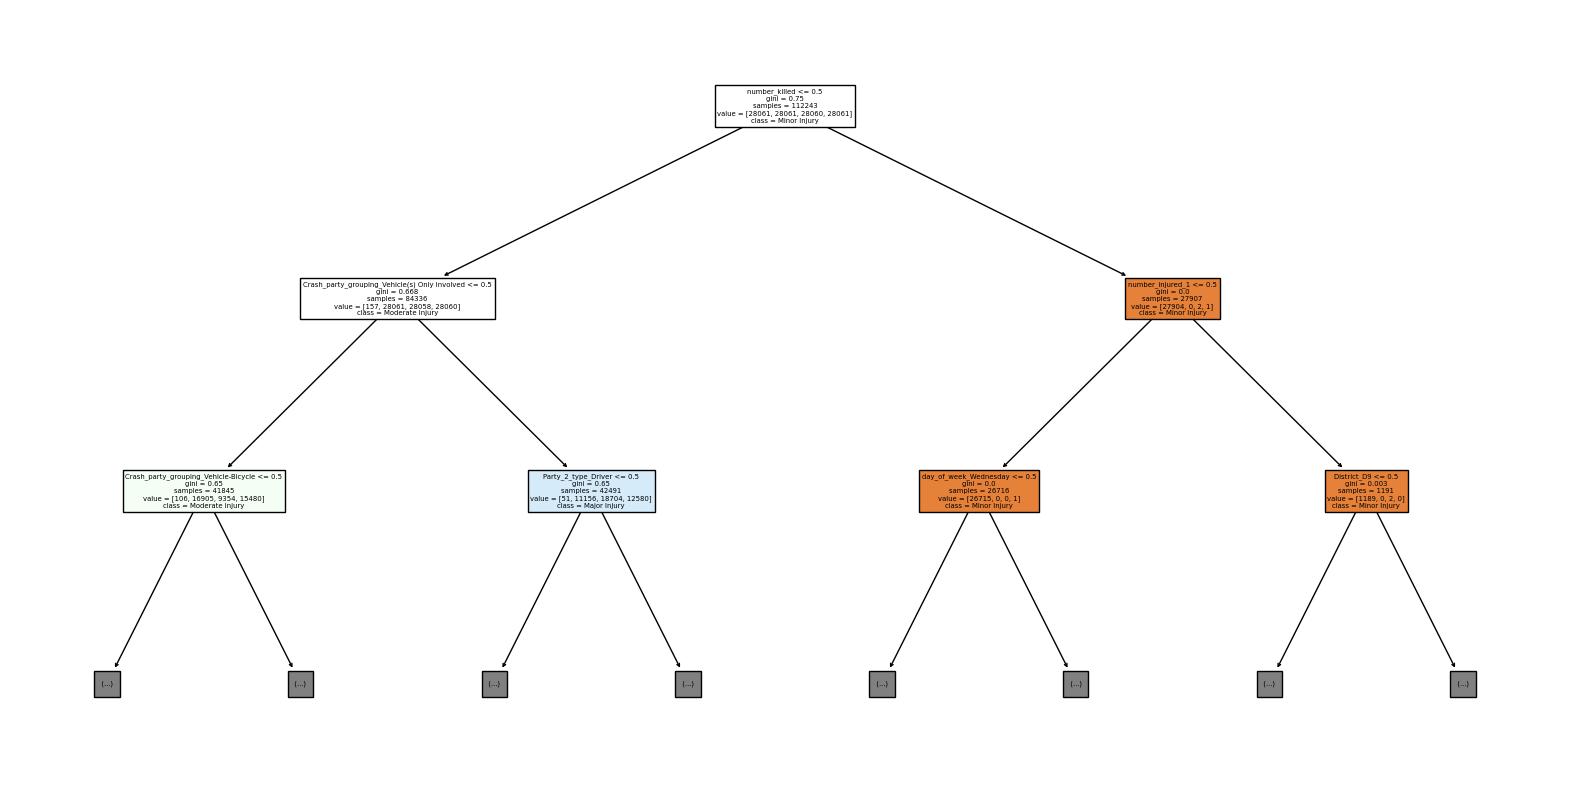

In [ ]:
# Visualize the Decision Tree
dt_classifier = results['original']['DT']['Classifier']
visualize_decision_tree(dt_classifier, X.columns, class_counts.index, 'decision_tree.png')


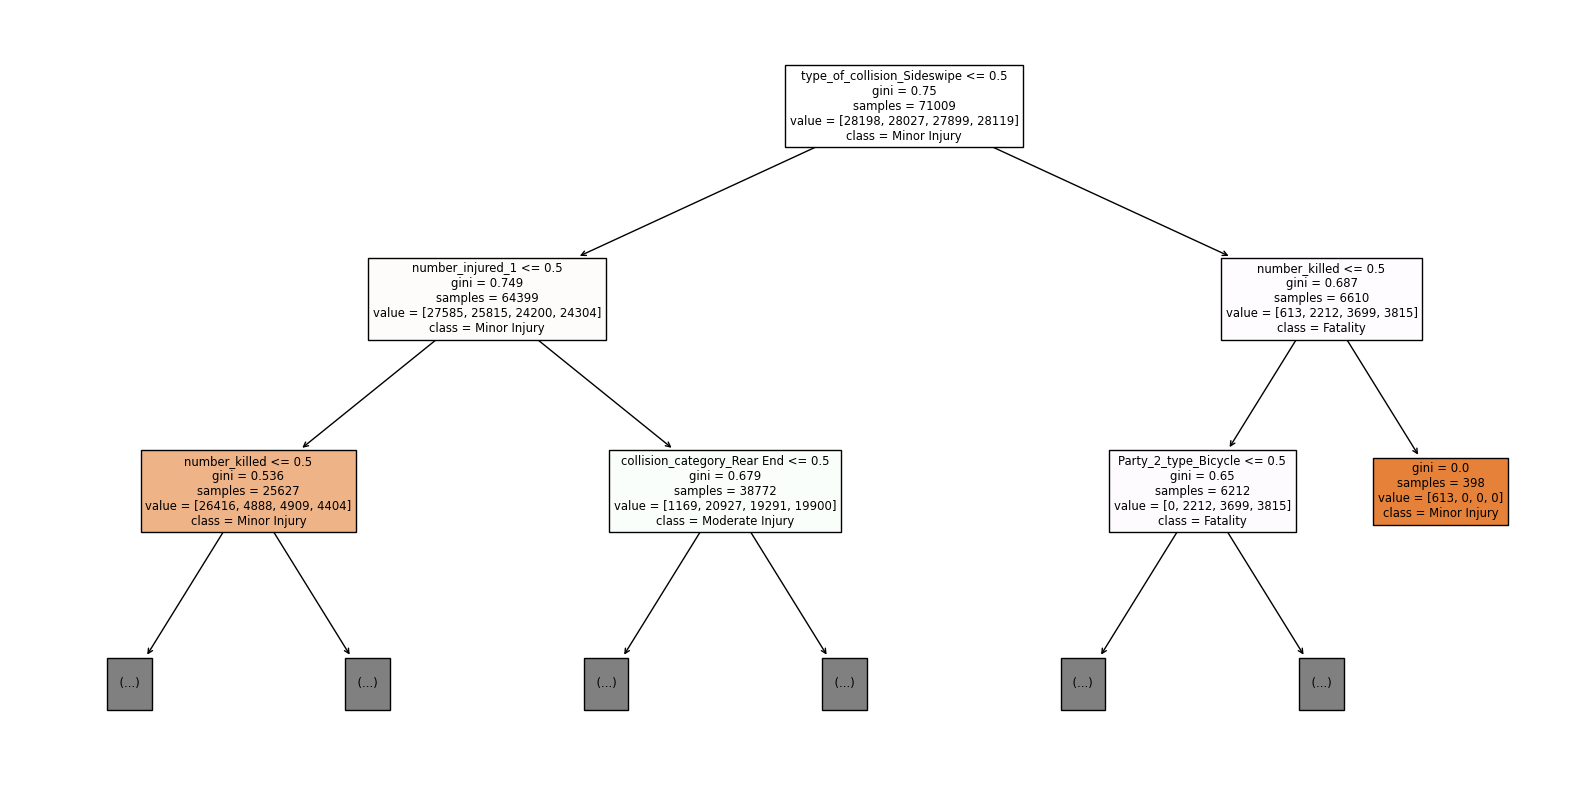

In [ ]:
# Visualize a tree from the Random Forest (change the tree_index to visualize different trees)
rf_classifier = results['original']['RF']['Classifier']
tree_index = 0

visualize_random_forest_tree(rf_classifier, tree_index, X.columns, class_counts.index, f'random_forest_tree_{tree_index}.png')

## PCA and Sampling(undersampling, oversampling, and SMOTE) Datasets

In [ ]:
std_pca_X = pca_optimal_ori.fit_transform(X)
X_pca_under, y_pca_under = undersampler.fit_resample(std_pca_X, y)
X_pca_over, y_pca_over = oversampler.fit_resample(std_pca_X, y)
X_pca_smote, y_pca_smote = smote.fit_resample(std_pca_X, y)

In [ ]:
pca_datasets = {
    'PCA': (std_pca_X,y),
    'PCA_under': (X_pca_under, y_pca_under),
    'PCA_over': (X_pca_over, y_pca_over),
    'PCA_smote': (X_pca_smote, y_pca_smote)
}

In [ ]:
pca_results = {}
for dataset_name, (X, y) in pca_datasets.items():
    print(f"Dataset: {dataset_name}")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    pca_results[dataset_name] = {}

    for classifier_name, classifier in classifiers.items():
        trained_classifier, y_pred = fit_and_predict(classifier, X_train, X_test, y_train)
        precision, recall, accuracy, f1, cm = evaluate_model(y_test, y_pred)

        pca_results[dataset_name][classifier_name] = {
            'Classifier': trained_classifier,
            'Precision': precision,
            'Recall': recall,
            'Accuracy': accuracy,
            'F1-score': f1,
            'Confusion Matrix': cm
        }

        print(f"{classifier_name} - Precision: {precision:.3f}, Recall: {recall:.3f}, Accuracy: {accuracy:.3f}, F1-score: {f1:.3f}, Confusion Matrix:\n {cm}")
    print("\n")

Dataset: PCA
kNN - Precision: 0.733, Recall: 0.702, Accuracy: 0.702, F1-score: 0.680, Confusion Matrix:
 [[7011    3    1    0]
 [  62 6740   35  178]
 [  29 2792 2207 1988]
 [  75 2531  655 3754]]
DT - Precision: 0.662, Recall: 0.668, Accuracy: 0.668, F1-score: 0.653, Confusion Matrix:
 [[6817  184    7    7]
 [  48 5523  834  610]
 [   1 1175 4491 1349]
 [  25 2963 2101 1926]]
RF - Precision: 0.821, Recall: 0.820, Accuracy: 0.820, F1-score: 0.820, Confusion Matrix:
 [[6998    2    4   11]
 [   0 6122  418  475]
 [   1  109 5369 1537]
 [   2  603 1895 4515]]
Naive Bayes - Precision: 0.640, Recall: 0.643, Accuracy: 0.643, F1-score: 0.638, Confusion Matrix:
 [[6427  311   84  193]
 [ 159 4660  966 1230]
 [   1  881 4612 1522]
 [  83 2374 2207 2351]]
SVM - Precision: 0.797, Recall: 0.795, Accuracy: 0.795, F1-score: 0.784, Confusion Matrix:
 [[7007    3    3    2]
 [   0 6077  573  365]
 [   0   73 6127  816]
 [   1 1503 2409 3102]]


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP - Precision: 0.783, Recall: 0.785, Accuracy: 0.785, F1-score: 0.780, Confusion Matrix:
 [[7011    2    0    2]
 [   0 5656  485  874]
 [   1  161 5795 1059]
 [   1 1233 2217 3564]]


Dataset: PCA_under
kNN - Precision: 0.738, Recall: 0.705, Accuracy: 0.705, F1-score: 0.683, Confusion Matrix:
 [[7009    5    1    0]
 [  54 6739   45  177]
 [  41 2771 2254 1950]
 [  73 2563  595 3784]]
DT - Precision: 0.666, Recall: 0.671, Accuracy: 0.671, F1-score: 0.661, Confusion Matrix:
 [[6803  198    5    9]
 [  24 5356  714  921]
 [   4 1057 4365 1590]
 [  27 2823 1865 2300]]
RF - Precision: 0.821, Recall: 0.819, Accuracy: 0.819, F1-score: 0.819, Confusion Matrix:
 [[6997    3    8    7]
 [   1 6069  445  500]
 [   1  120 5351 1544]
 [   4  587 1856 4568]]
Naive Bayes - Precision: 0.642, Recall: 0.645, Accuracy: 0.645, F1-score: 0.641, Confusion Matrix:
 [[6418  320   83  194]
 [ 148 4614  945 1308]
 [   3  827 4698 1488]
 [  71 2370 2198 2376]]
SVM - Precision: 0.799, Recall: 0.797, Accuracy:

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP - Precision: 0.776, Recall: 0.778, Accuracy: 0.778, F1-score: 0.775, Confusion Matrix:
 [[7010    4    0    1]
 [   3 5529  483 1000]
 [   1  165 5654 1196]
 [   3 1280 2082 3650]]


Dataset: PCA_over
kNN - Precision: 0.733, Recall: 0.702, Accuracy: 0.702, F1-score: 0.680, Confusion Matrix:
 [[7011    3    1    0]
 [  62 6740   35  178]
 [  29 2792 2207 1988]
 [  75 2531  655 3754]]
DT - Precision: 0.662, Recall: 0.668, Accuracy: 0.668, F1-score: 0.653, Confusion Matrix:
 [[6817  184    7    7]
 [  48 5523  834  610]
 [   1 1175 4491 1349]
 [  25 2963 2101 1926]]
RF - Precision: 0.821, Recall: 0.820, Accuracy: 0.820, F1-score: 0.820, Confusion Matrix:
 [[6998    2    4   11]
 [   0 6122  418  475]
 [   1  109 5369 1537]
 [   2  603 1895 4515]]
Naive Bayes - Precision: 0.640, Recall: 0.643, Accuracy: 0.643, F1-score: 0.638, Confusion Matrix:
 [[6427  311   84  193]
 [ 159 4660  966 1230]
 [   1  881 4612 1522]
 [  83 2374 2207 2351]]
SVM - Precision: 0.797, Recall: 0.795, Accuracy: 

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP - Precision: 0.783, Recall: 0.785, Accuracy: 0.785, F1-score: 0.780, Confusion Matrix:
 [[7011    2    0    2]
 [   0 5656  485  874]
 [   1  161 5795 1059]
 [   1 1233 2217 3564]]


Dataset: PCA_smote
kNN - Precision: 0.733, Recall: 0.702, Accuracy: 0.702, F1-score: 0.680, Confusion Matrix:
 [[7011    3    1    0]
 [  62 6740   35  178]
 [  29 2792 2207 1988]
 [  75 2531  655 3754]]
DT - Precision: 0.662, Recall: 0.668, Accuracy: 0.668, F1-score: 0.653, Confusion Matrix:
 [[6817  184    7    7]
 [  48 5523  834  610]
 [   1 1175 4491 1349]
 [  25 2963 2101 1926]]
RF - Precision: 0.821, Recall: 0.820, Accuracy: 0.820, F1-score: 0.820, Confusion Matrix:
 [[6998    2    4   11]
 [   0 6122  418  475]
 [   1  109 5369 1537]
 [   2  603 1895 4515]]
Naive Bayes - Precision: 0.640, Recall: 0.643, Accuracy: 0.643, F1-score: 0.638, Confusion Matrix:
 [[6427  311   84  193]
 [ 159 4660  966 1230]
 [   1  881 4612 1522]
 [  83 2374 2207 2351]]
SVM - Precision: 0.797, Recall: 0.795, Accuracy:

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP - Precision: 0.783, Recall: 0.785, Accuracy: 0.785, F1-score: 0.780, Confusion Matrix:
 [[7011    2    0    2]
 [   0 5656  485  874]
 [   1  161 5795 1059]
 [   1 1233 2217 3564]]




In [ ]:
import pickle

# Save the clustering results to a file
def save_results(results, filename):
    with open(filename, 'wb') as f:
        pickle.dump(results, f)



# Save the clustering results
save_results(pca_results, '/content/drive/MyDrive/A_M_L/modeling_with_samp_PCA.pickle')

## LDA and Sampling(undersampling, oversampling, and SMOTE) Datasets

In [ ]:
std_lda_X = lda_optimal_ori.fit_transform(X, y)
X_lda_under, y_lda_under = undersampler.fit_resample(std_lda_X, y)
X_lda_over, y_lda_over = oversampler.fit_resample(std_lda_X, y)
X_lda_smote, y_lda_smote = smote.fit_resample(std_lda_X, y)

In [ ]:
lda_datasets = {
    'LDA': (std_lda_X,y),
    'LDA_under': (X_lda_under, y_lda_under),
    'LDA_over': (X_lda_over, y_lda_over),
    'LDA_smote': (X_lda_smote, y_lda_smote)
}

In [ ]:
lda_results = {}
for dataset_name, (X, y) in lda_datasets.items():
    print(f"Dataset: {dataset_name}")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    lda_results[dataset_name] = {}

    for classifier_name, classifier in classifiers.items():
        trained_classifier, y_pred = fit_and_predict(classifier, X_train, X_test, y_train)
        precision, recall, accuracy, f1, cm = evaluate_model(y_test, y_pred)

        lda_results[dataset_name][classifier_name] = {
            'Classifier': trained_classifier,
            'Precision': precision,
            'Recall': recall,
            'Accuracy': accuracy,
            'F1-score': f1,
            'Confusion Matrix': cm
        }

        print(f"{classifier_name} - Precision: {precision:.3f}, Recall: {recall:.3f}, Accuracy: {accuracy:.3f}, F1-score: {f1:.3f}, Confusion Matrix:\n {cm}")
    print("\n")

Dataset: LDA
kNN - Precision: 0.706, Recall: 0.718, Accuracy: 0.718, F1-score: 0.704, Confusion Matrix:
 [[7014    1    0    0]
 [   3 5483  634  895]
 [   2  495 5347 1172]
 [   5 2273 2437 2300]]
DT - Precision: 0.711, Recall: 0.722, Accuracy: 0.722, F1-score: 0.705, Confusion Matrix:
 [[7008    6    1    0]
 [   0 5491  725  799]
 [   2  398 5589 1027]
 [   1 2257 2589 2168]]
RF - Precision: 0.778, Recall: 0.781, Accuracy: 0.781, F1-score: 0.777, Confusion Matrix:
 [[7013    1    1    0]
 [   1 6002  479  533]
 [   2  243 5309 1462]
 [   2 1167 2253 3593]]
Naive Bayes - Precision: 0.671, Recall: 0.682, Accuracy: 0.682, F1-score: 0.664, Confusion Matrix:
 [[6981   34    0    0]
 [   1 5050 1033  931]
 [   2  784 5299  931]
 [   2 2563 2629 1821]]
SVM - Precision: 0.686, Recall: 0.698, Accuracy: 0.698, F1-score: 0.681, Confusion Matrix:
 [[7001   14    0    0]
 [   3 5426  805  781]
 [   2  684 5186 1144]
 [   5 2694 2333 1983]]
MLP - Precision: 0.705, Recall: 0.717, Accuracy: 0.717, 

In [ ]:
import pickle

# Save the clustering results to a file
def save_results(results, filename):
    with open(filename, 'wb') as f:
        pickle.dump(results, f)



# Save the clustering results
save_results(lda_results, '/content/drive/MyDrive/A_M_L/modeling_with_samp_LDA.pickle')

## 6. Discussion of Results for Classification Algorithm


---




*  The Random Forest algorithm performed better on an oversampled binary-encoded original dataset containing a substantial amount of categorical information. The oversampled dataset had the highest accuracy, followed by a Smote dataset, and an original encoded dataset without any sampling. The under-sampled dataset showed the lowest accuracy.
*	The same trend is observed on the PCA and LDA dataset.
*	When comparing Random Forest performance on PCA, LDA and encoded dataset encoded dataset gave a slightly higher accuracy than the other two dataset.
*	The smote and oversampled dataset performed better on Random Forest than the Naïve bayes, SVM, MLP algorithm.


---
</br>

**Reason for Oversampling performing better than SMOTE.**



> Oversampling involves randomly duplicating samples from the minority class until the class distribution is balanced, while SMOTE creates synthetic samples by interpolating between existing samples in the minority class. oversampling may perform better than SMOTE because it directly replicates existing samples rather than creating new ones, which can lead to a more conservative approach to creating synthetic data.






## 7. Conclusion

---



*   We followed all the CRISP-DM methodology in this project.
*	From the results we can see that Random Forest performed well in our dataset.
*	We predicted the collision severity class labels on the test set successfully with 90 Accuracy with High Precision, Recall and F1 score on the original encoded dataset.
*	From the Random Forest when we viewed multiple decision trees, we can see that Broad side /T-bone collision and Rear end collision where the root node.
*	Midday and Afternoon where also the sub node and main node in most of the random forest decision trees.
*	Vehicles only involved and Vehicles pedestrians involved are also the root nodes in most of the random forest trees.
*	From this we can say that these are the most contributing factors for the injury.

---





